# Contents

### 01. Importing Libraries and Data
### 02. Visualizations
    Number of Customers by Profile Groups
    Usage Frequency and Expenditure by Profiles
    Customer Profile Comparison by Region
    Order Frequency by Department and Price Range Info
    Ordering Habits by Profiles
    Loyalty Flag Pie Chart and Aggregations
    Additional Visualizations
### 03. Exporting Visualizations

# 01. Importing Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

In [2]:
# Assign path to str
path = r'/Users/allyfornino/Documents/10-2022 Instacart Basket Analysis'

In [3]:
# Import active customers data set
active = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_profiles_ords_prods_all.pkl'))

In [4]:
# Check output
active.head()

,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,num_of_dependents,income,region,age_group,income_group,dependent_group
0,2539329,1,2,8,NaN,True,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents
1,2398795,2,3,7,15.0,False,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents
2,473747,3,3,12,21.0,False,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents
3,2254736,4,4,7,29.0,False,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents
4,431534,5,4,15,28.0,False,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents


In [5]:
active.shape

(30964564, 36)

In [6]:
# Import unique active customers data set
active_unique = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_unique_ords_prods_all.pkl'))

In [7]:
# Check output
active_unique.head()

,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,num_of_dependents,income,region,age_group,income_group,dependent_group
0,2539329,1,2,8,NaN,True,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents
59,2968173,15,1,9,7.0,False,196,2,0,Soda,...,Female,Indiana,69,6/3/2019,NaN,54313,Midwest,Senior,Mid income,No dependents
131,2293453,2,5,14,6.0,False,196,3,0,Soda,...,Female,Louisiana,62,2/3/2017,NaN,151988,South,Adult,High income,Has dependents
335,1573906,10,3,10,6.0,False,196,2,0,Soda,...,Male,Montana,71,6/18/2019,NaN,124643,West,Senior,High income,No dependents
540,1593000,10,3,8,7.0,False,196,17,0,Soda,...,Female,Oklahoma,38,1/22/2019,NaN,52311,South,Adult,Mid income,Has dependents


In [8]:
active_unique.shape

(162631, 36)

# 02. Visualizations

## Number of Customers by Profile Groups

### Age Group Profile

Text(0, 0.5, 'Number of Customers')

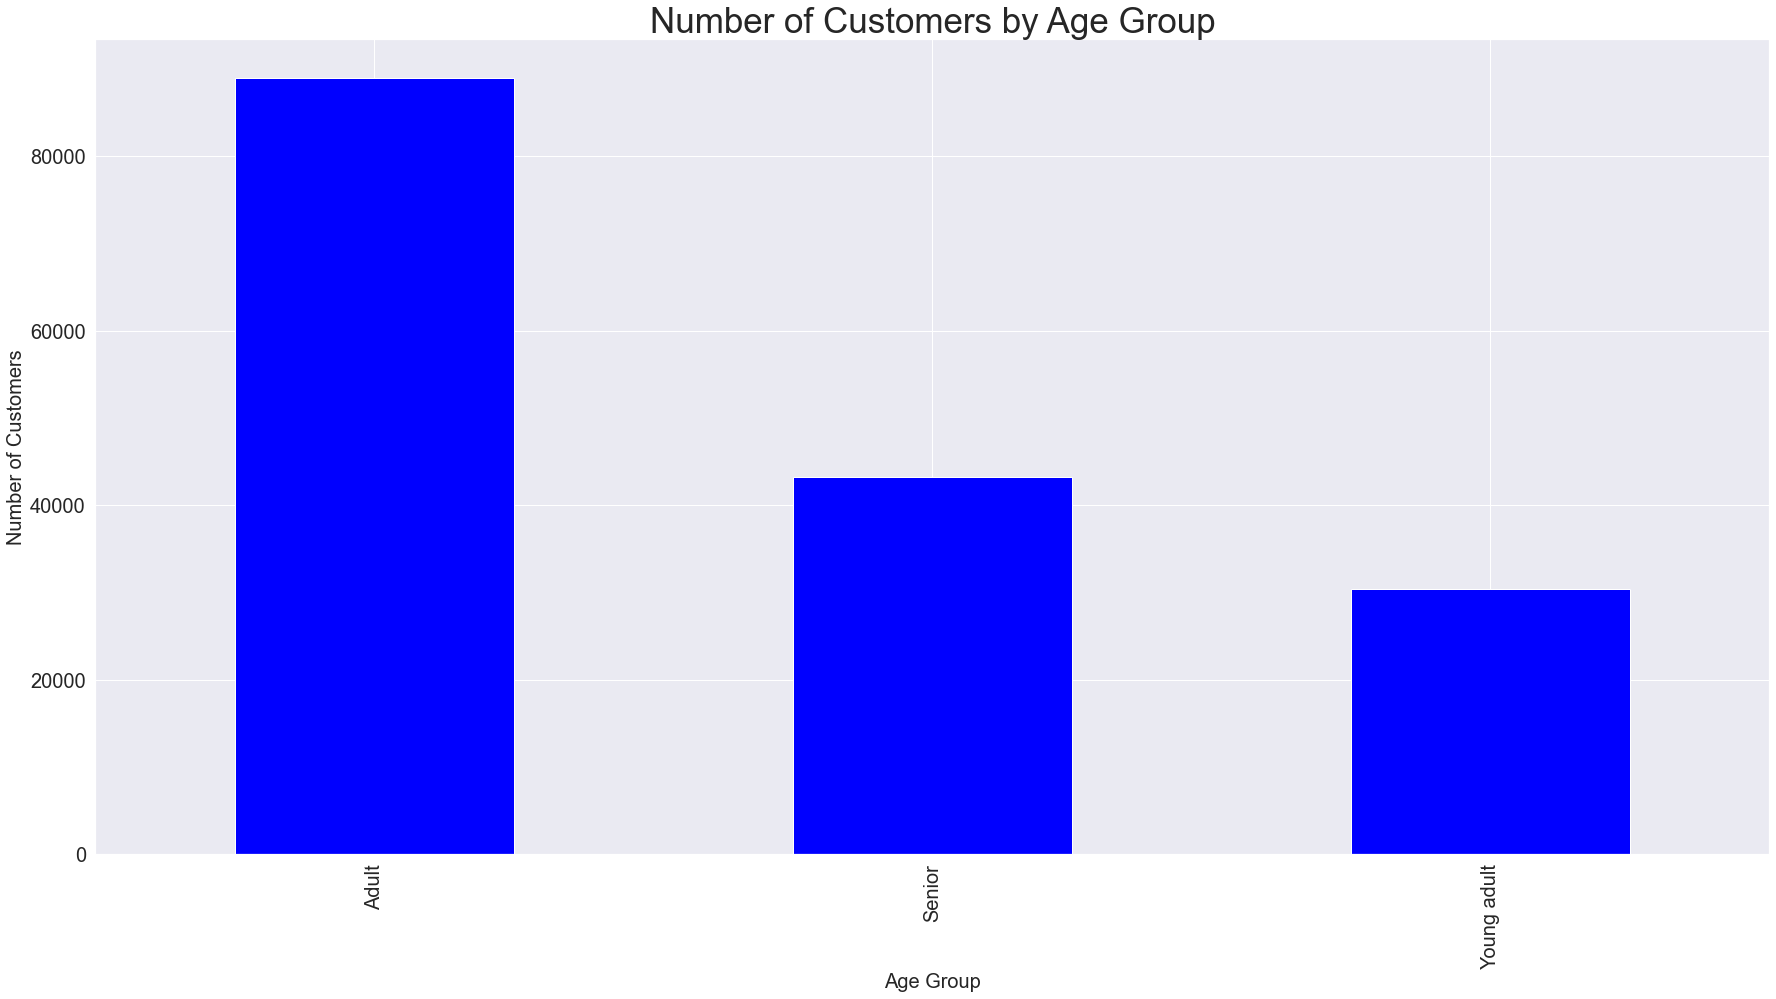

In [9]:
# Setting script figure size
sns.set(rc = {'figure.figsize':(30, 15)})
# Creating a bar chart for number of customers by age group
bar = active_unique['age_group'].value_counts().plot.bar(color = 'blue', fontsize = 20)
plt.title('Number of Customers by Age Group', fontsize = 35)
plt.xlabel('Age Group', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)

### Income Group Profile

Text(0, 0.5, 'Number of Customers')

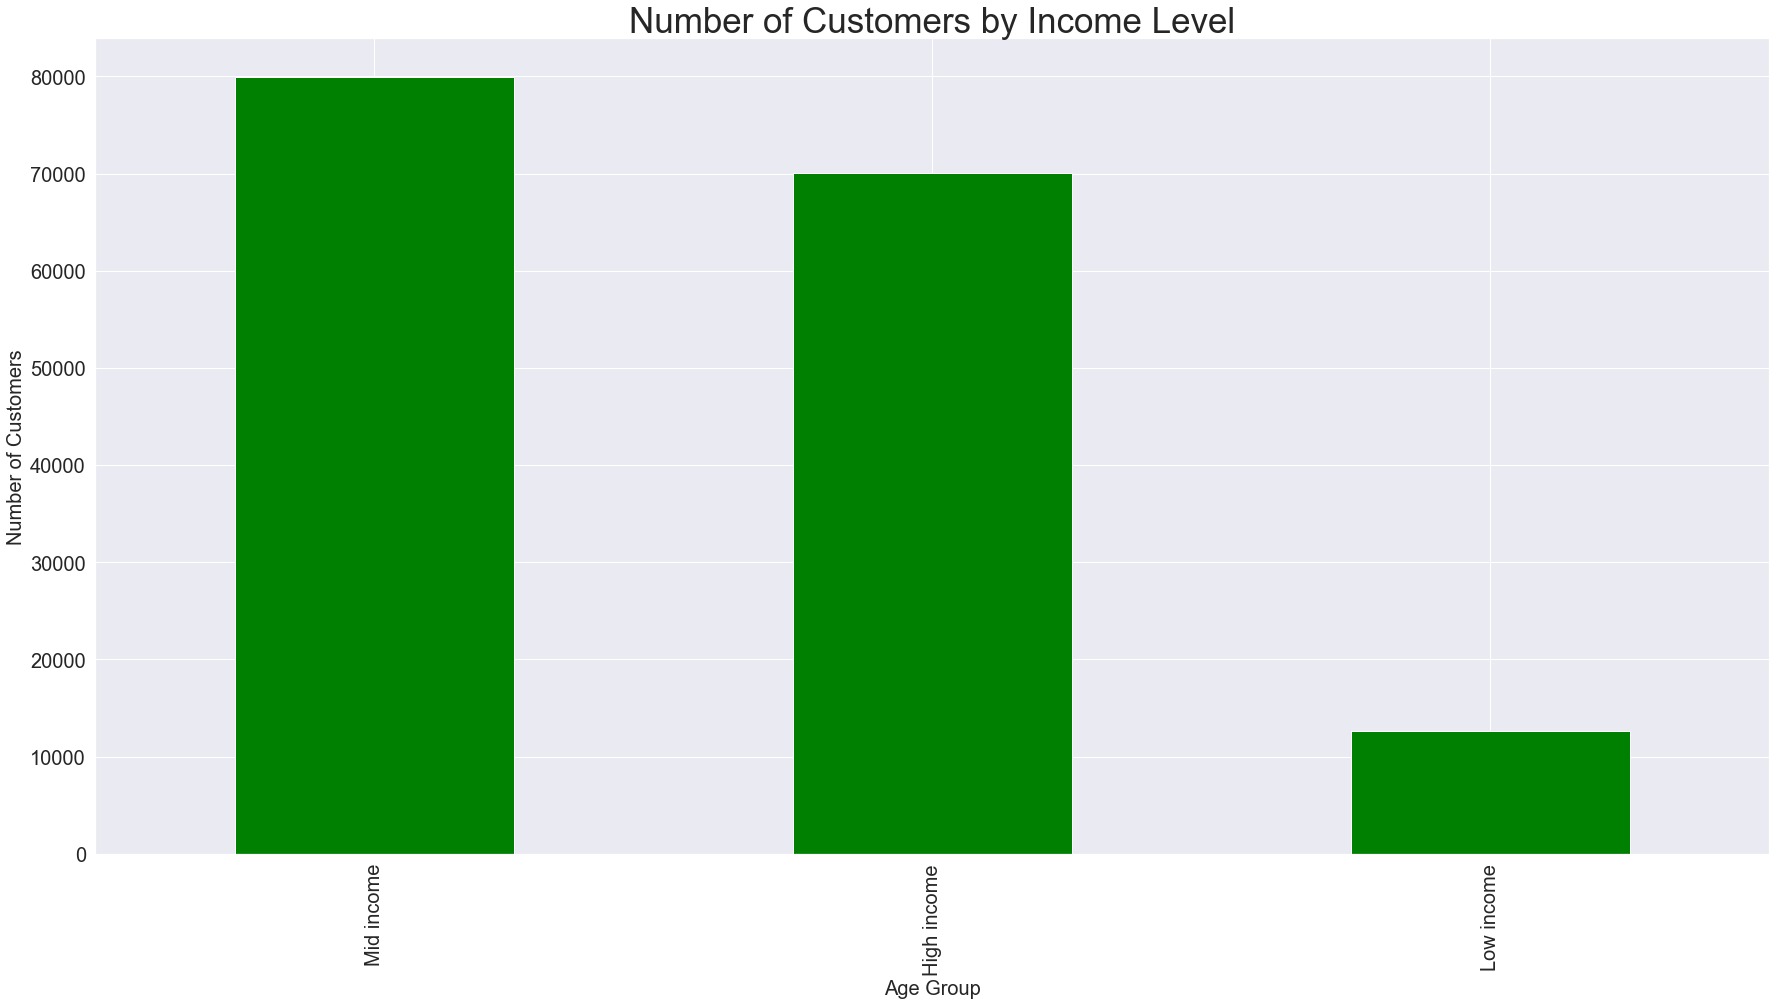

In [10]:
# Creating a bar chart for number of customers by income level
income_bar = active_unique['income_group'].value_counts().plot.bar(color = 'green', fontsize = 20)
plt.title('Number of Customers by Income Level', fontsize = 35)
plt.xlabel('Age Group', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)

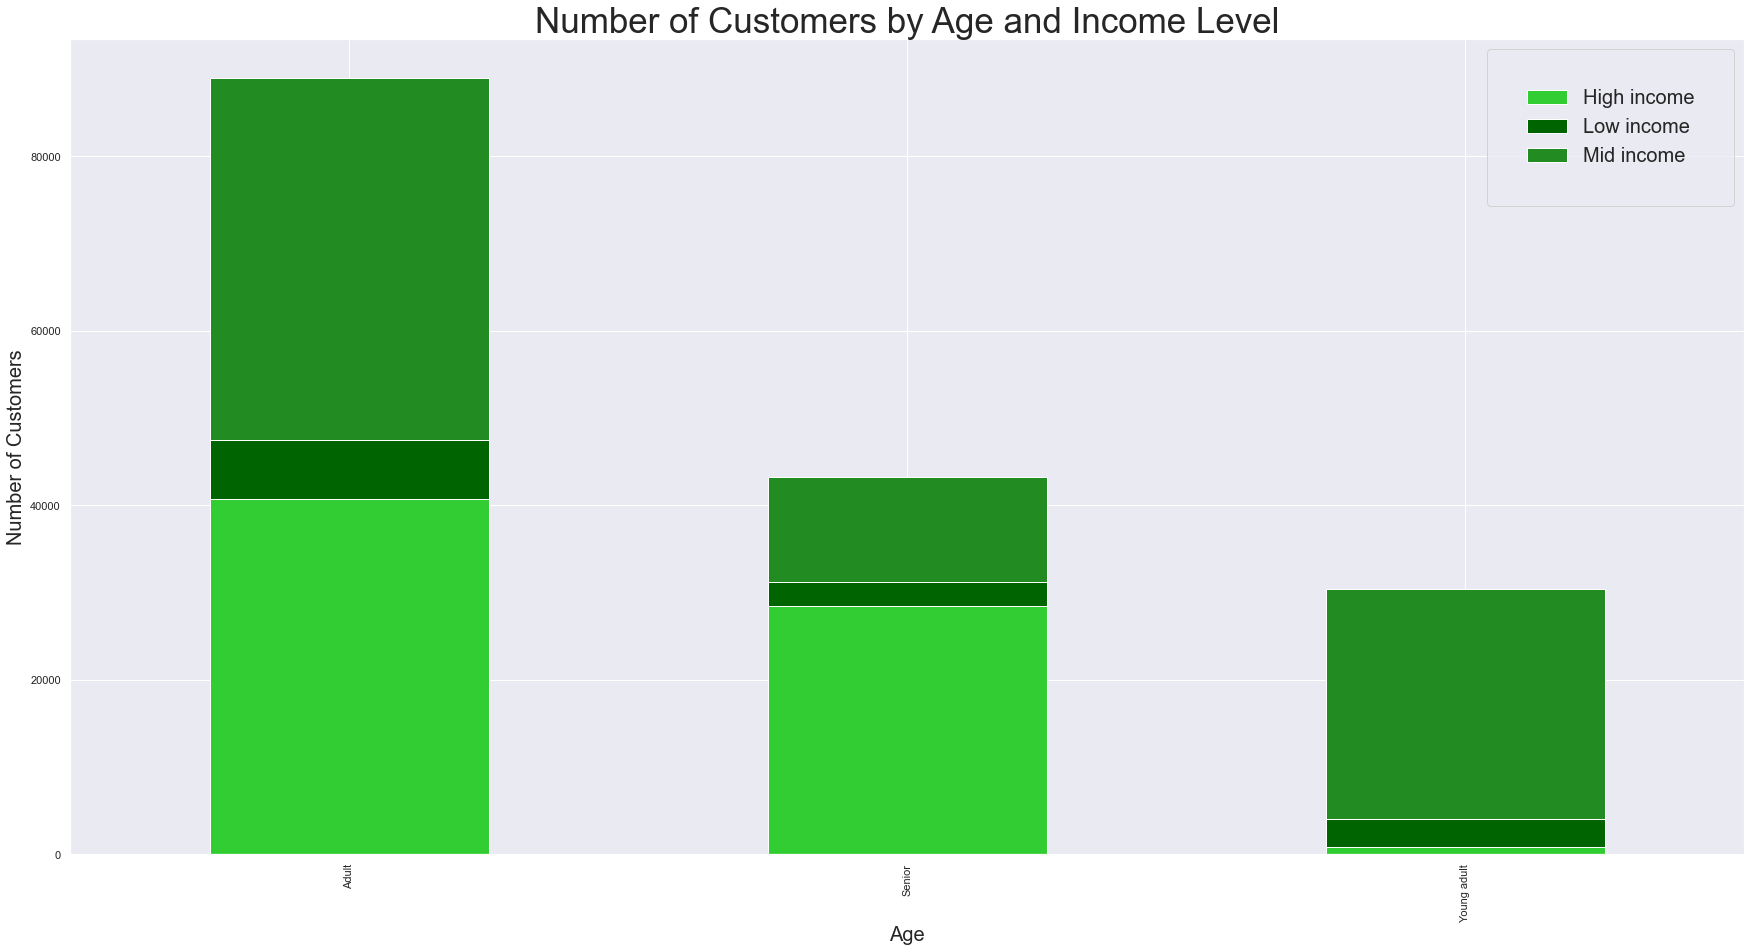

In [11]:
# Creating a stacked bar chart that shows age and income distribution
bar_stacked = active_unique.groupby(['age_group', 'income_group']).size().unstack().sort_index(ascending=True).plot(kind = 'bar', color = ['limegreen', 'darkgreen', 'forestgreen'], stacked = True)
plt.title('Number of Customers by Age and Income Level', fontsize = 35)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)
plt.legend(prop={'size':20}, borderpad = 2)

### Family Profile

In [12]:
active_unique['dependent_group'].value_counts()

Has dependents    121904
No dependents      40727
Name: dependent_group, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Family Group')

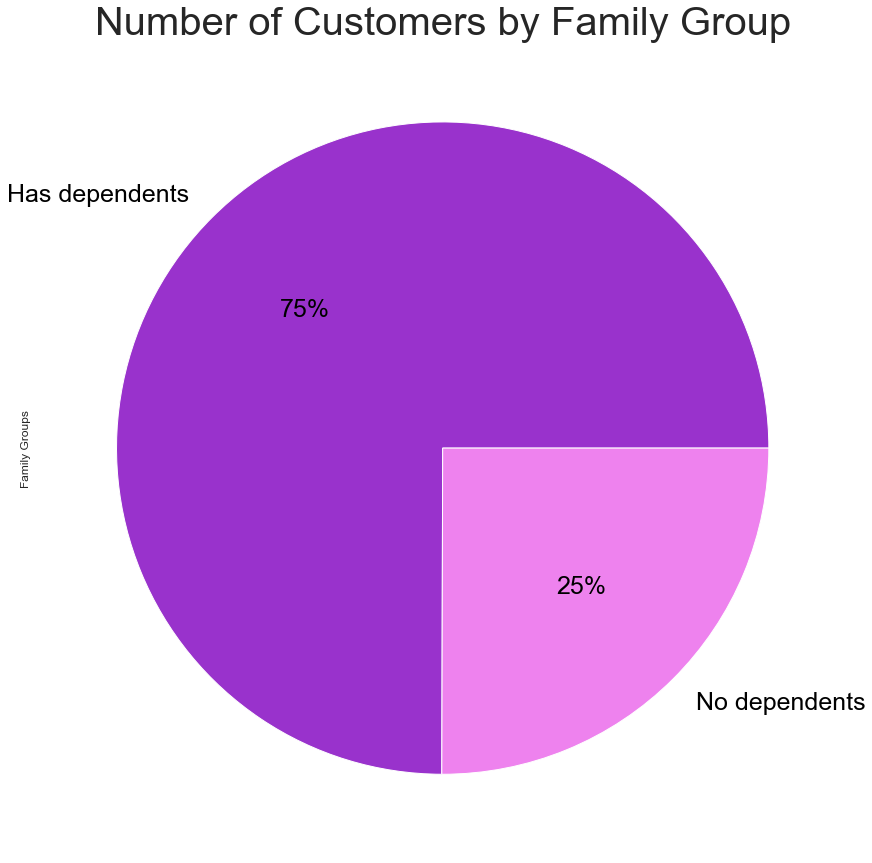

In [13]:
pie=active_unique['dependent_group'].value_counts().plot.pie(label = 'Family Groups', labels = active_unique['dependent_group'], autopct=('%1.f%%'), colors=['darkorchid','violet'], textprops={'fontsize': 25, 'color': 'black'})
plt.title('Number of Customers by Family Group', fontsize = 40)

## Usage Frequency and Expenditure by Profiles

### Age Group Aggregation

In [14]:
# Aggregating max, min, mean
active_unique.groupby(['age_group']).agg({'order_frequency':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_frequency               prices              
                       mean  min   max      mean  min      max
age_group                                                     
Adult             13.789928  0.0  30.0  7.995792  1.0  14900.0
Senior            13.717052  0.0  30.0  8.877991  1.0  14900.0
Young adult       13.753309  0.0  30.0  7.854332  1.0     24.2

In [15]:
# Fixing prices
active_unique.loc[active_unique['prices'] > 100, 'prices'] = np.nan

In [16]:
# Aggregating again
active_unique.groupby(['age_group']).agg({'order_frequency':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_frequency               prices           
                       mean  min   max      mean  min   max
age_group                                                  
Adult             13.789928  0.0  30.0  7.828474  1.0  25.0
Senior            13.717052  0.0  30.0  7.845009  1.0  24.2
Young adult       13.753309  0.0  30.0  7.854332  1.0  24.2

### Income Group Aggregation

In [17]:
# Aggregating max, min, mean
active_unique.groupby(['income_group']).agg({'order_frequency':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_frequency               prices           
                        mean  min   max      mean  min   max
income_group                                                
High income        13.535723  0.0  30.0  7.993013  1.0  25.0
Low income         14.901545  0.0  30.0  7.099889  1.0  19.6
Mid income         13.783879  0.0  30.0  7.818071  1.0  24.2

### Family Group Aggregation

In [18]:
# Aggregating max, min, mean
active_unique.groupby(['dependent_group']).agg({'order_frequency':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_frequency               prices           
                           mean  min   max      mean  min   max
dependent_group                                                
Has dependents        13.762157  0.0  30.0  7.830192  1.0  25.0
No dependents         13.768348  0.0  30.0  7.860176  1.0  24.2

## Customer Profile Comparison by Region

### Age Group Profiles

In [19]:
# Age group by region
age_region = pd.crosstab(active_unique['region'], active_unique['age_group'].sort_values(ascending = False))
age_region

age_group,Adult,Senior,Young adult
region,,,
Midwest,21145,10169,7062
Northeast,15740,7580,5261
South,29493,14433,10267
West,22627,11068,7786


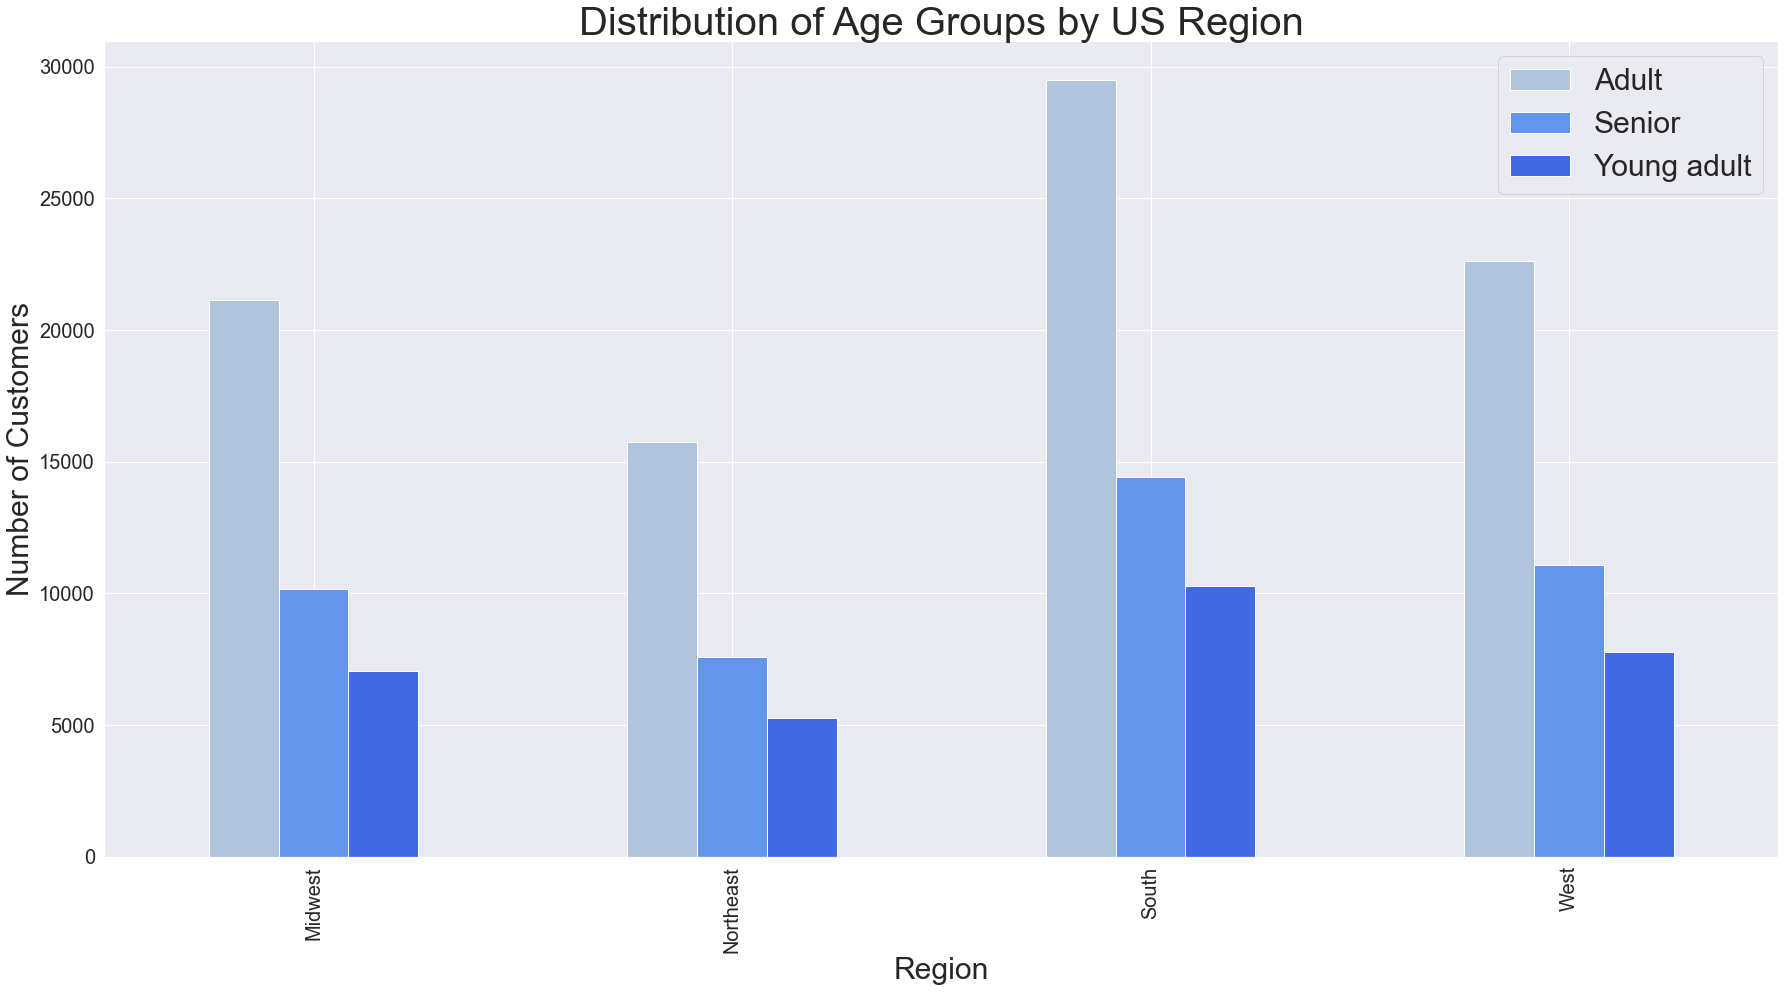

In [20]:
# Displaying age_region as a bar chart
bar_age_region = age_region.plot.bar(color = ['lightsteelblue', 'cornflowerblue', 'royalblue'], fontsize = 20)
plt.title('Distribution of Age Groups by US Region', fontsize = 40)
plt.xlabel('Region', fontsize = 30)
plt.ylabel('Number of Customers', fontsize = 30)
plt.legend(fontsize = 30)

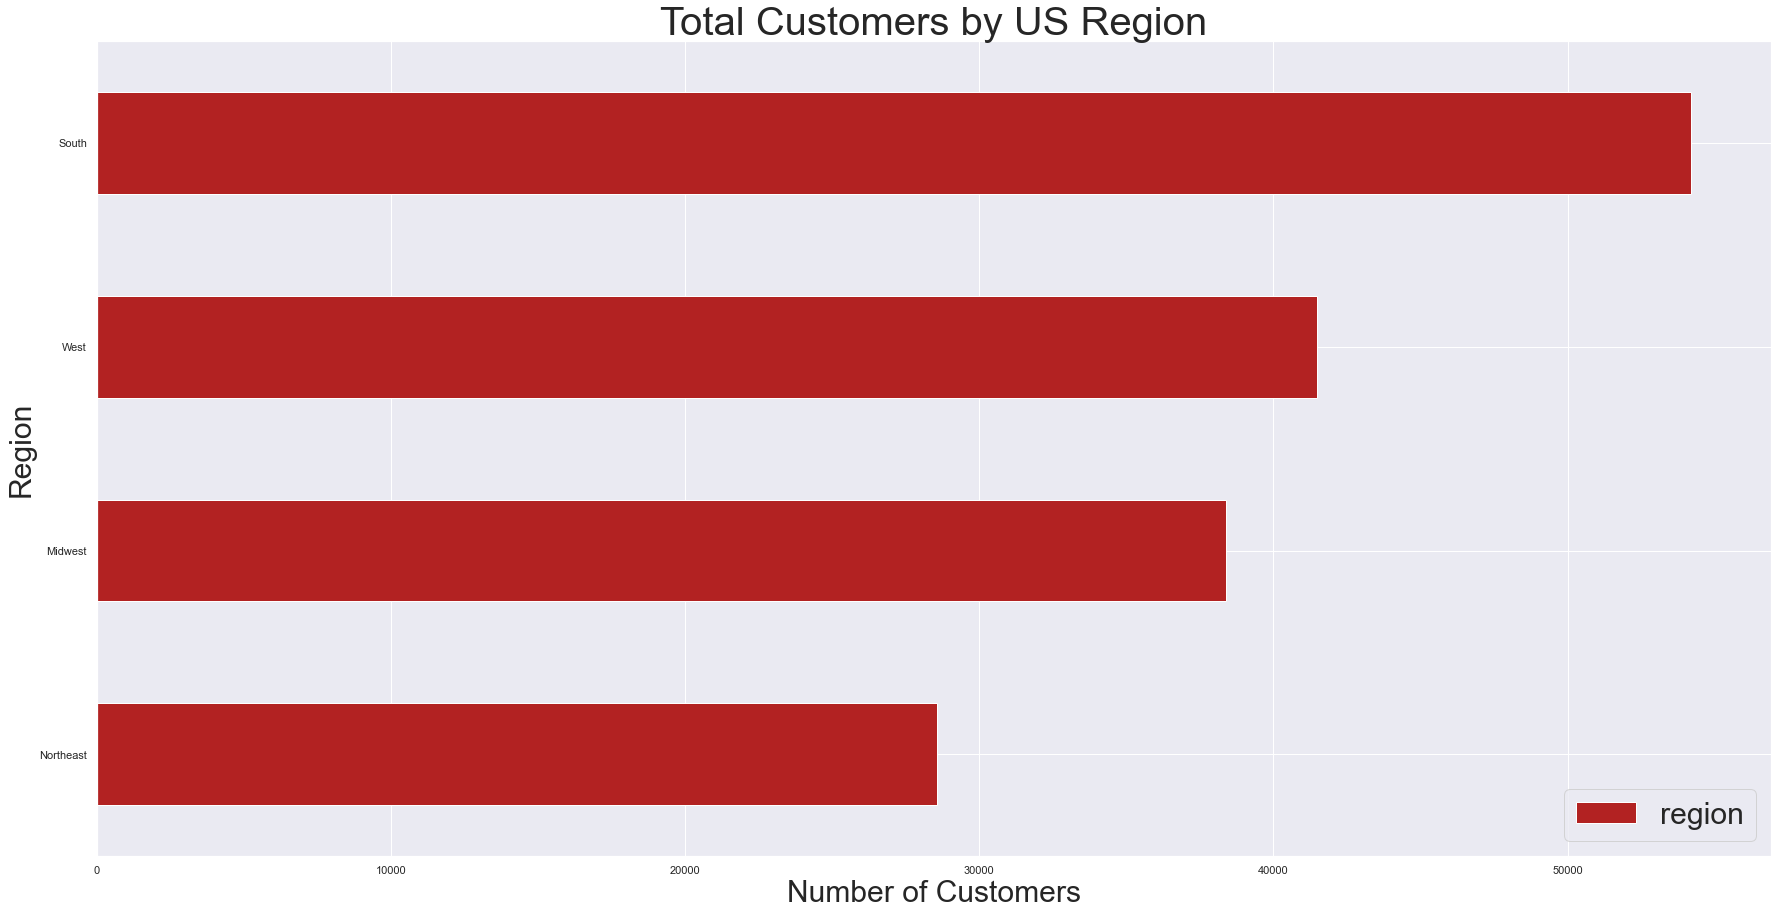

In [21]:
# Displaying customers across regions
bar_tot_custs_region = active_unique['region'].value_counts(dropna = False).sort_values(ascending = True).plot.barh(color = 'firebrick')
plt.title('Total Customers by US Region', fontsize = 40)
plt.xlabel('Number of Customers', fontsize = 30)
plt.ylabel('Region', fontsize = 30)
plt.legend(fontsize = 30)

### Income Group Profiles

In [22]:
# Income group by region
income_region = pd.crosstab(active_unique['region'], active_unique['income_group'].sort_values(ascending = False)).reindex()[['Low income', 'Mid income', 'High income']]
income_region

income_group,Low income,Mid income,High income
region,,,
Midwest,2933,18687,16756
Northeast,2248,13964,12369
South,4200,26836,23157
West,3244,20438,17799


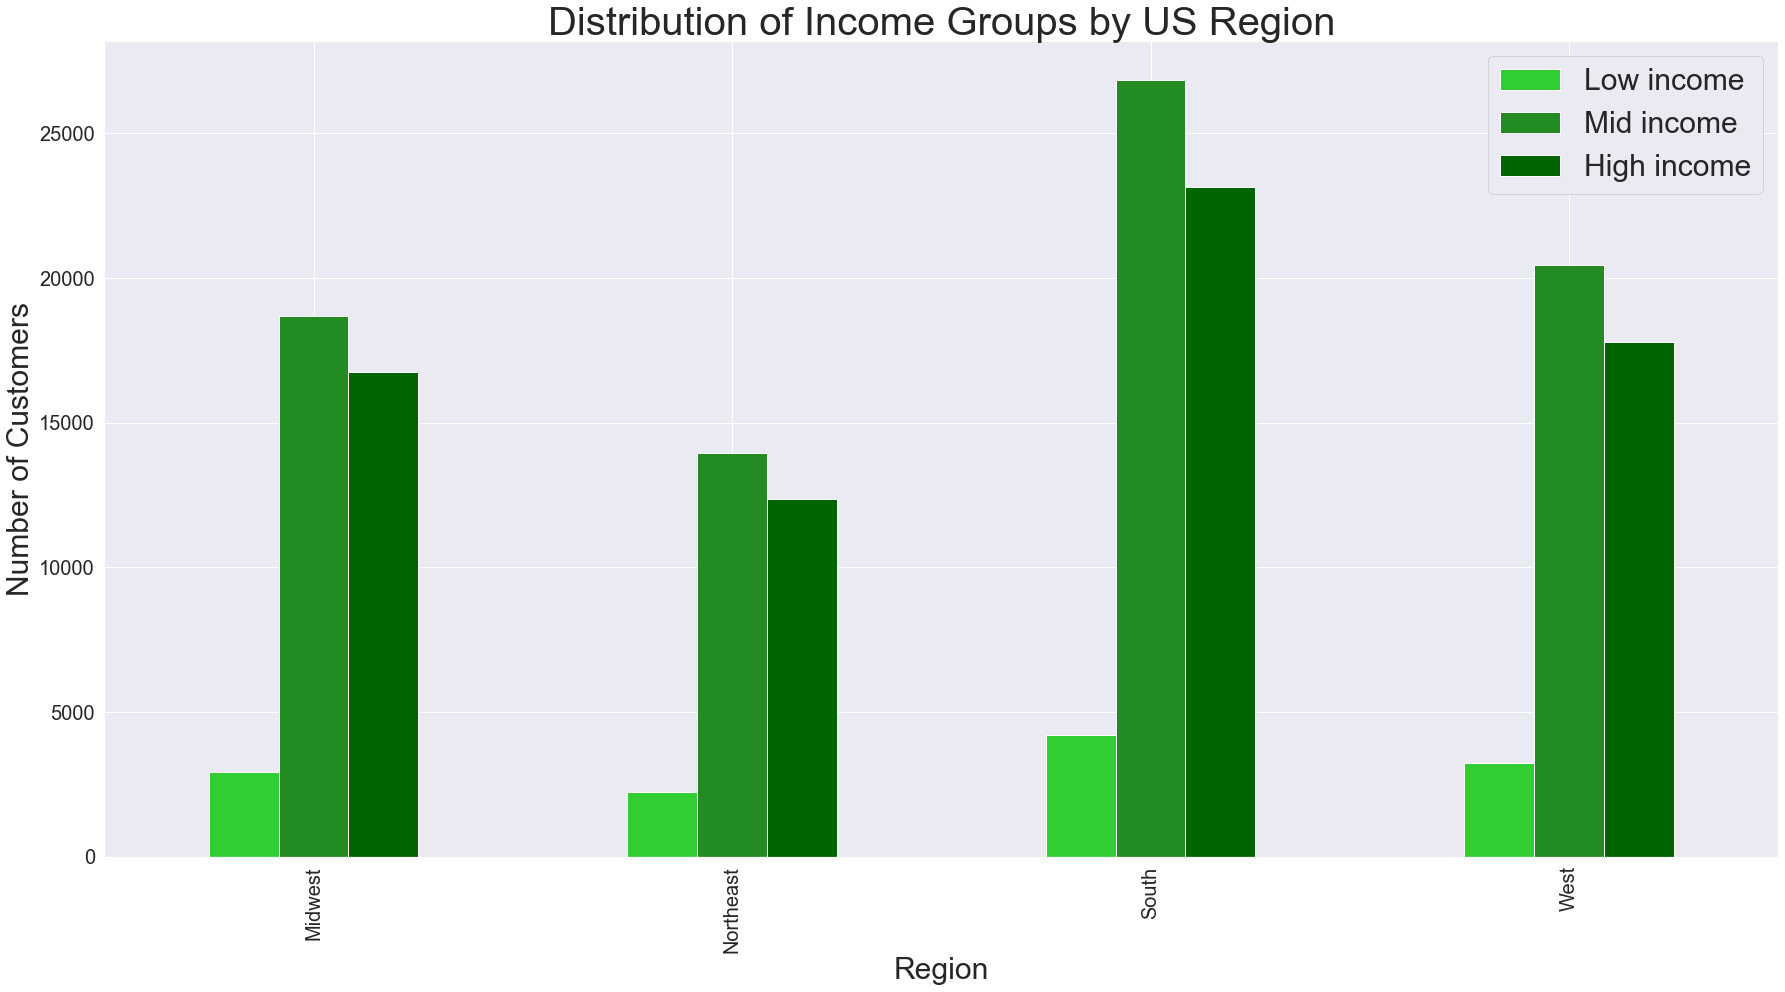

In [23]:
# Displaying age_region as a bar chart

bar_income_region = income_region.plot.bar(color = ['limegreen', 'forestgreen', 'darkgreen'], fontsize = 20)
plt.title('Distribution of Income Groups by US Region', fontsize = 40)
plt.xlabel('Region', fontsize = 30)
plt.ylabel('Number of Customers', fontsize = 30)
plt.legend(fontsize = 30)

### Family Group Profiles

In [24]:
# Family group by region
dependents_region = pd.crosstab(active_unique['region'], active_unique['dependent_group'].sort_values(ascending = False))
dependents_region

dependent_group,Has dependents,No dependents
region,,
Midwest,28810,9566
Northeast,21326,7255
South,40656,13537
West,31112,10369


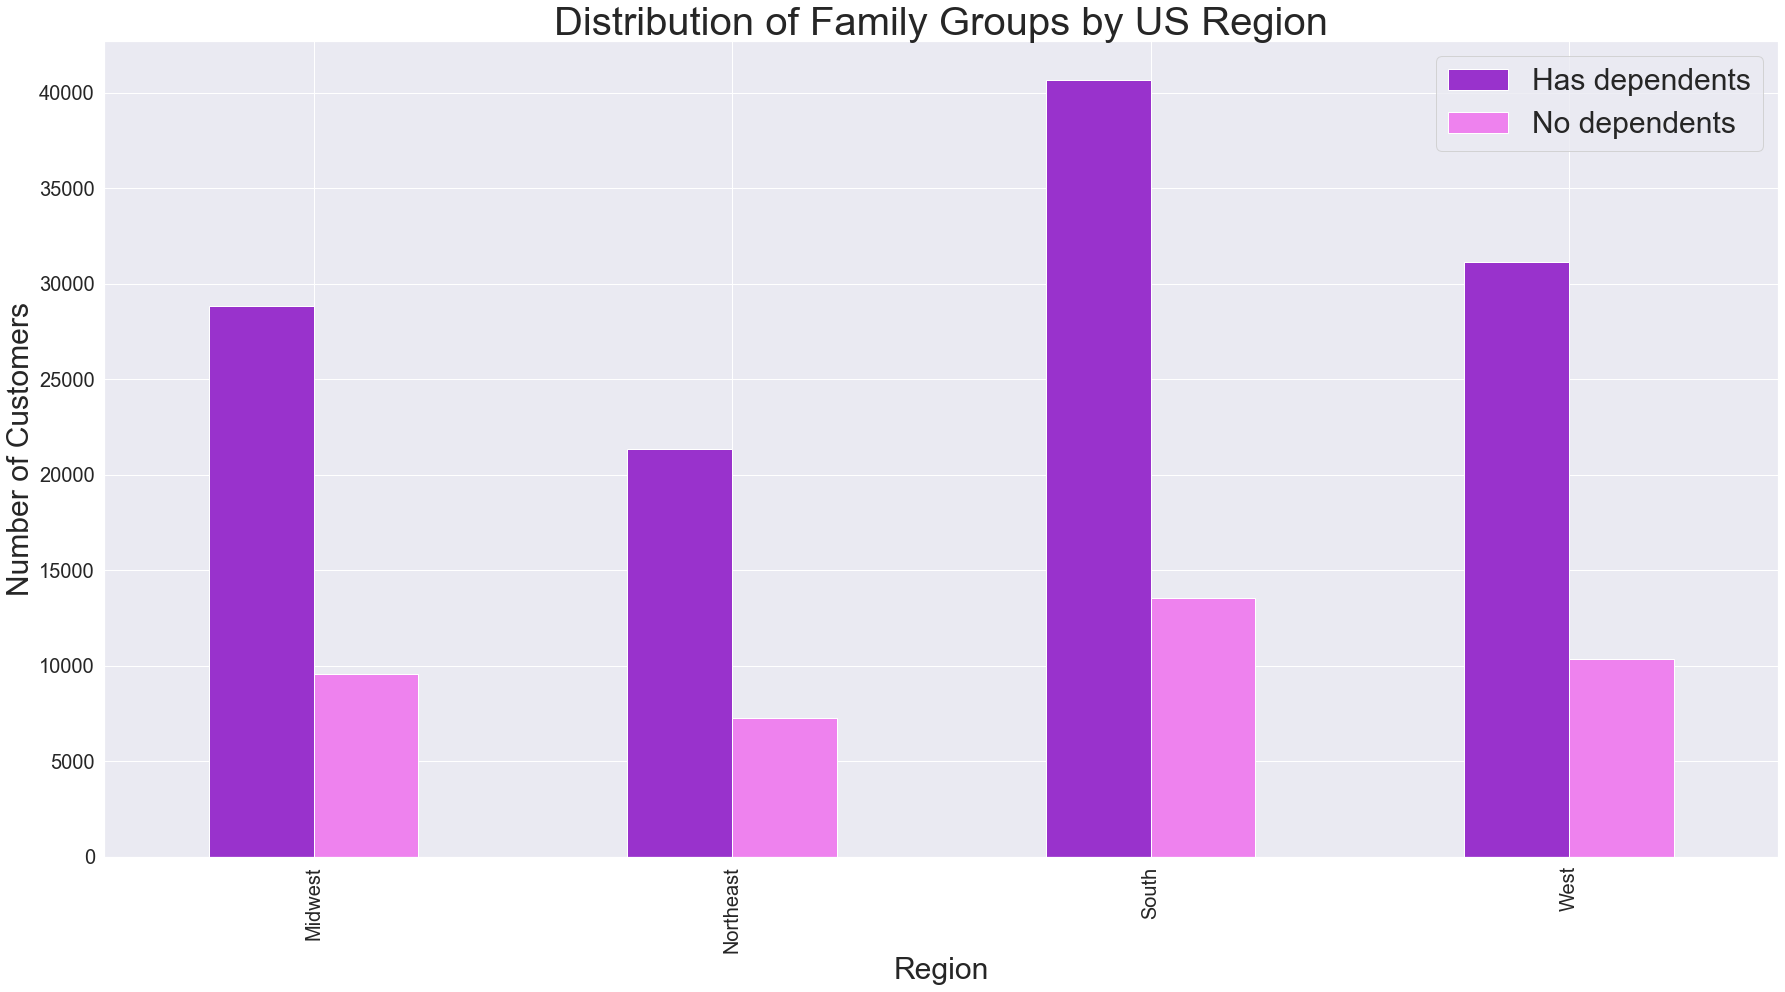

In [25]:
# Displaying dependents_region as a bar chart

bar_dependents_region = dependents_region.plot.bar(color = ['darkorchid', 'violet'], fontsize = 20)
plt.title('Distribution of Family Groups by US Region', fontsize = 40)
plt.xlabel('Region', fontsize = 30)
plt.ylabel('Number of Customers', fontsize = 30)
plt.legend(fontsize = 30)

## Order Frequency by Department and Price Range Info

### Order Frequency by Department

Text(0, 0.5, 'Number of Orders')

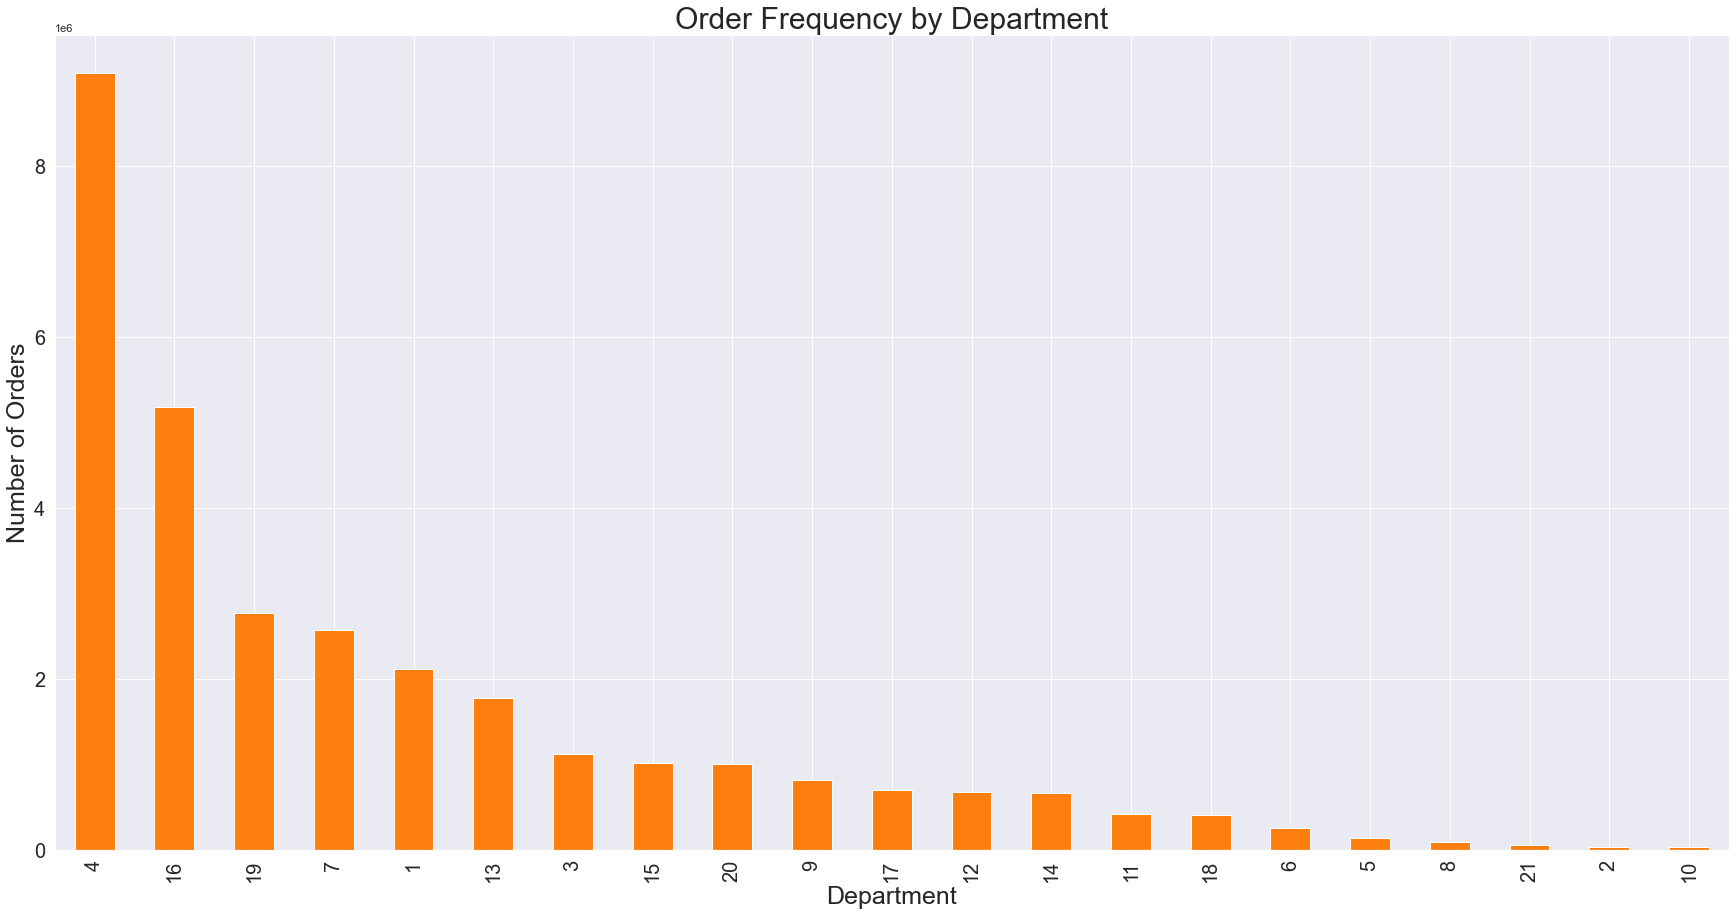

In [26]:
# Displaying order frequency by department as a bar chart
bar_department = active['department_id'].value_counts().plot.bar(color = 'tab:orange', fontsize = 20)
plt.title('Order Frequency by Department', fontsize = 30)
plt.xlabel('Department', fontsize = 25)
plt.ylabel('Number of Orders', fontsize = 25)

### Price Range Pie Chart

In [27]:
def price_label(row):
    if row['prices'] <= 5:
        return 'Low-range product'
    elif (row['prices'] > 5) and (row['prices'] <= 15):
        return 'Mid-range product'
    elif row['prices'] > 15:
        return 'High-range product'
    else: return 'Not enough data'

In [28]:
active['price_range'] = active.apply(price_label, axis = 1)

In [29]:
active['price_range'].value_counts(dropna = False)

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range, dtype: int64

Text(0.5, 1.0, 'Number of Items by Price Range')

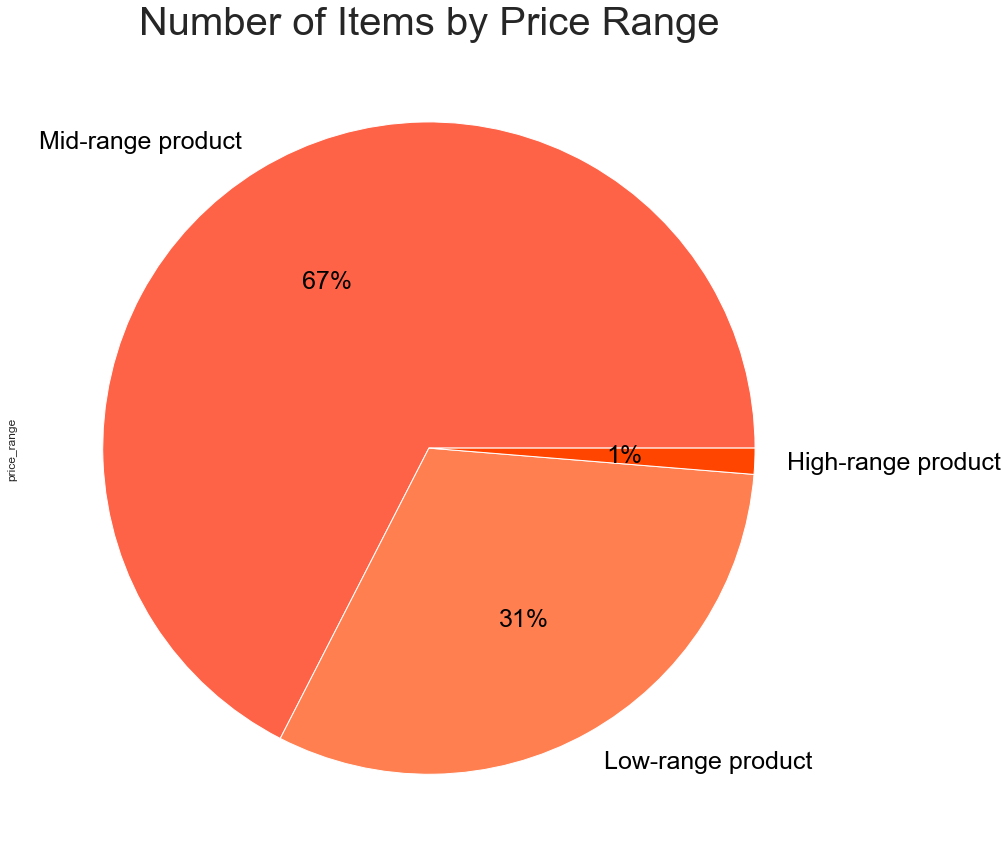

In [30]:
# Pie chart for number of items in each price range
labels = ['Mid-range product', 'Low-range product', 'High-range product']
pie_price_range = active['price_range'].value_counts().plot.pie(labels = labels, autopct=('%1.f%%'), colors=['tomato', 'coral', 'orangered'], textprops={'fontsize': 25, 'color': 'black'})
plt.title('Number of Items by Price Range', fontsize = 40)

In [31]:
# Price range by region
price_region = pd.crosstab(active['region'], active['price_range'].sort_values(ascending = False))
price_region

price_range,High-range product,Low-range product,Mid-range product
region,,,
Midwest,93280,2267085,4901148
Northeast,69732,1712360,3682593
South,132661,3217500,6960978
West,102280,2477895,5347052


In [32]:
prop = price_region.div(price_region.sum(axis=1), axis=0)

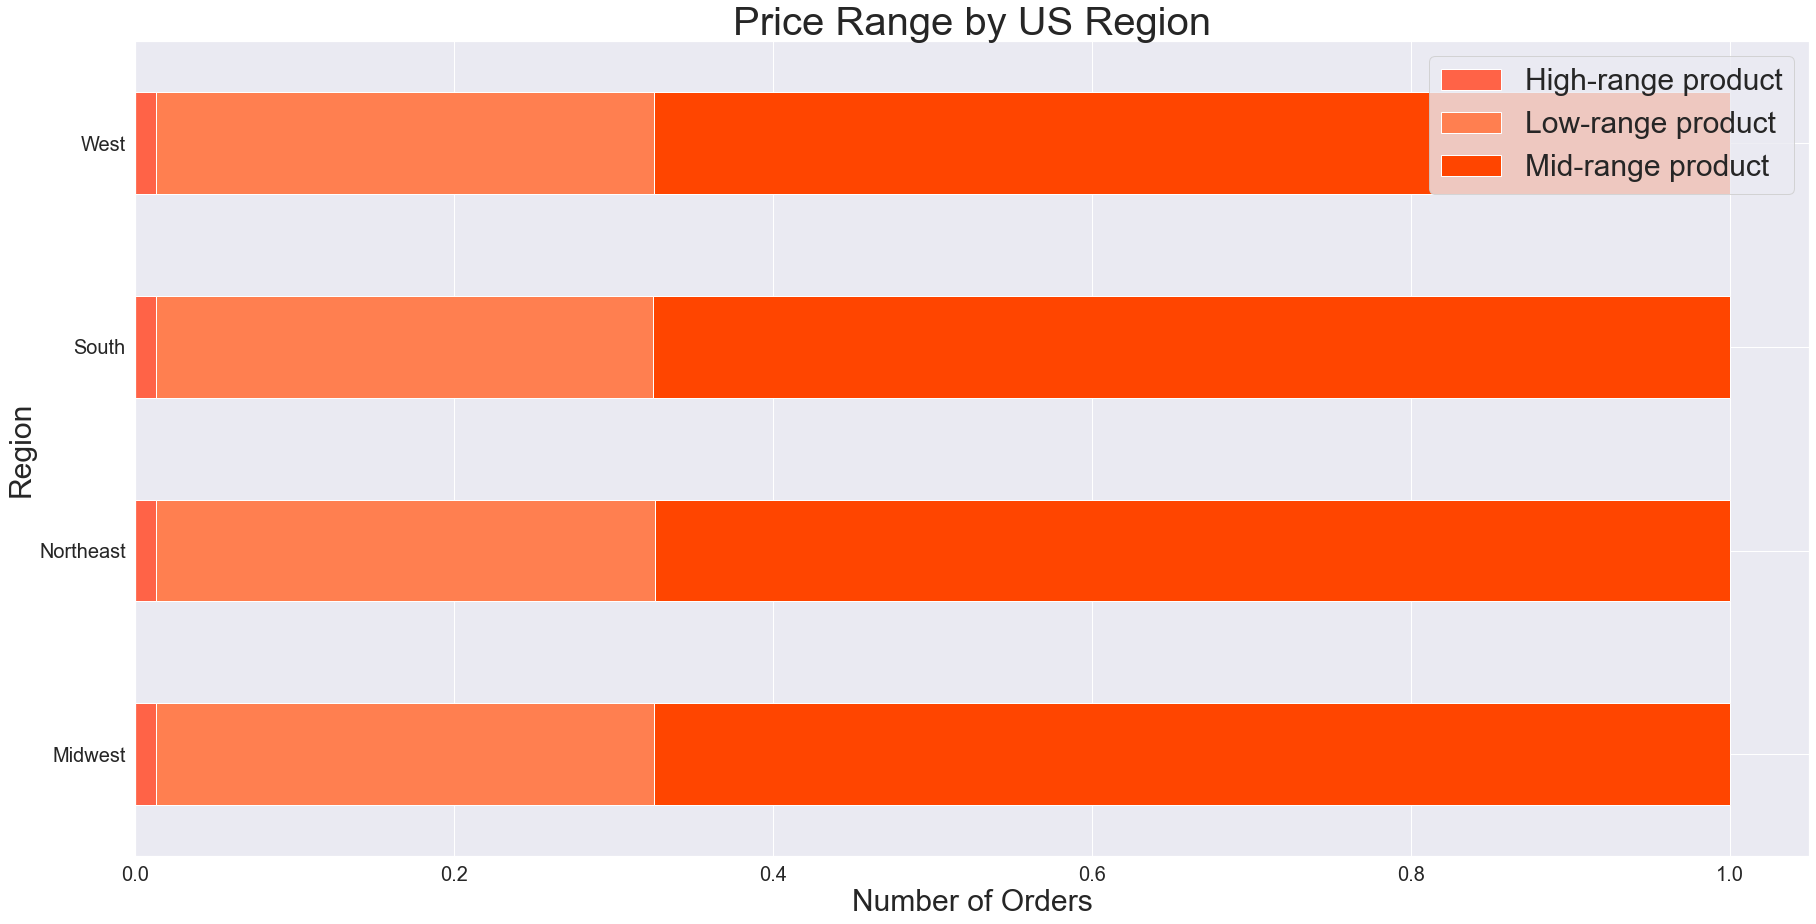

In [33]:
# Displaying price_range by region as a stacked bar chart
bar_price_region = prop.plot.barh(color = ['tomato', 'coral', 'orangered'], stacked = True, fontsize = 20)
plt.title('Price Range by US Region', fontsize = 40)
plt.xlabel('Number of Orders', fontsize = 30)
plt.ylabel('Region', fontsize = 30)
plt.legend(fontsize = 30)

## Ordering Habits by Profiles

In [34]:
# Price range by age group
price_age_group = pd.crosstab(active['age_group'], active['price_range'].sort_values(ascending = False))
price_age_group

price_range,High-range product,Low-range product,Mid-range product
age_group,,,
Adult,216584,5295248,11439585
Senior,106915,2559099,5529530
Young adult,74454,1820493,3922656


In [35]:
prop_age = price_age_group.div(price_age_group.sum(axis=1), axis=0)

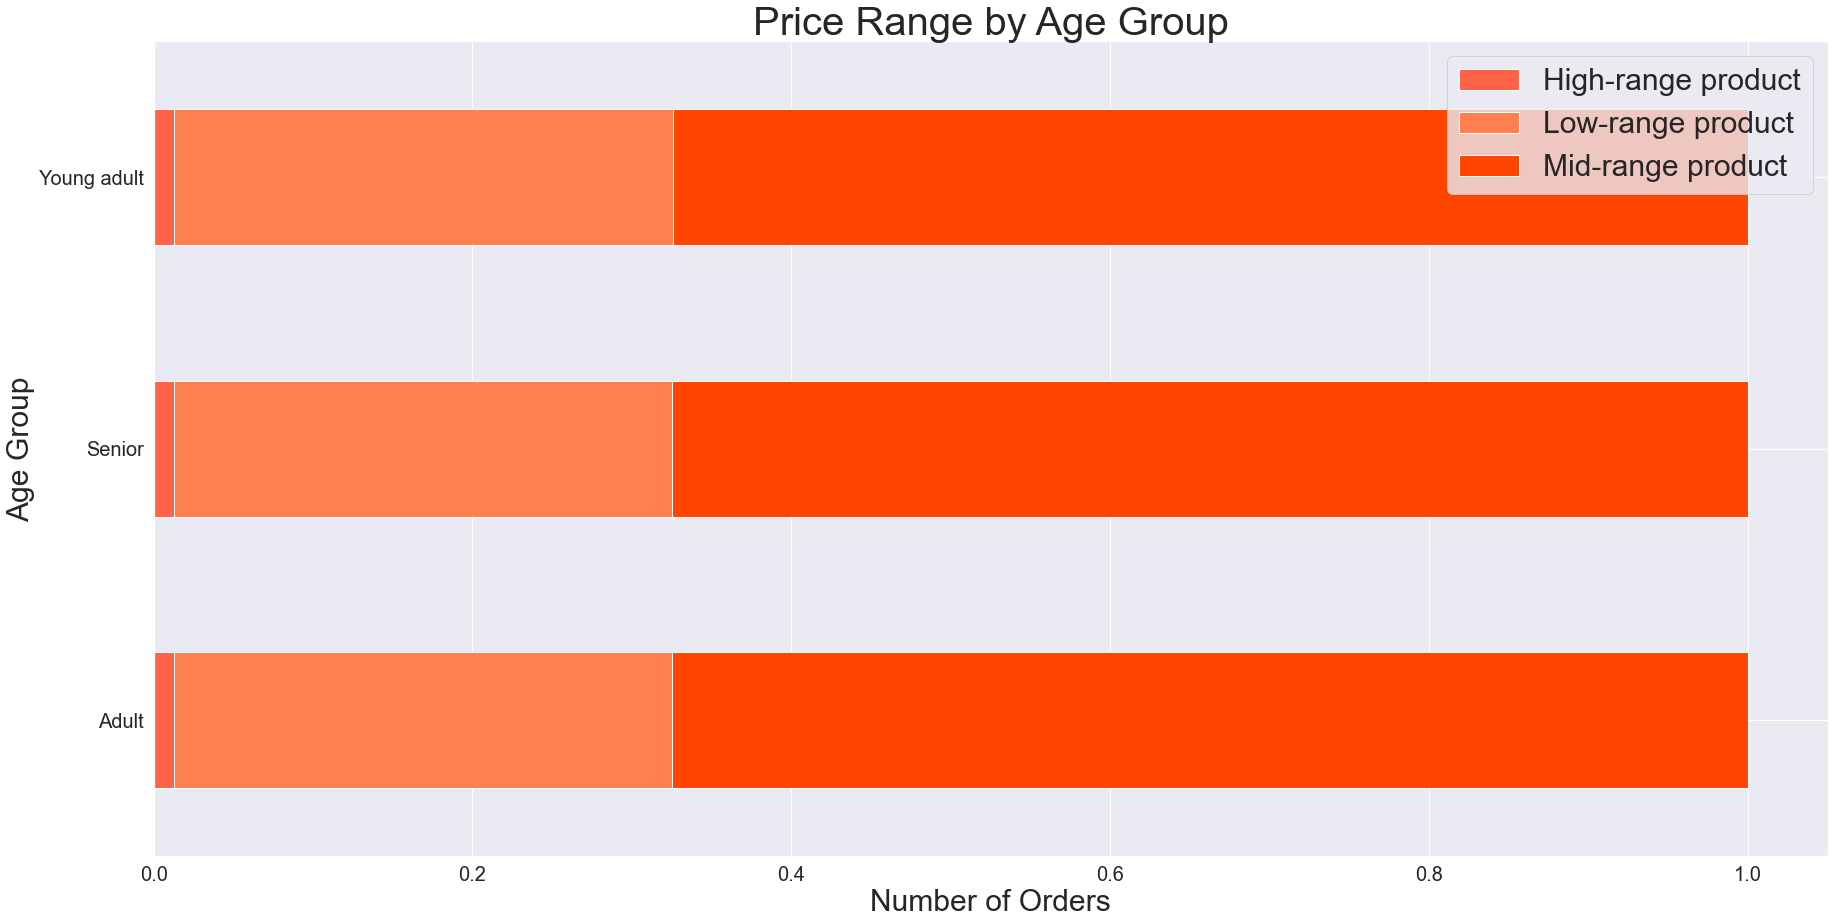

In [36]:
# Displaying price_range by age group as a stacked bar chart
bar_price_age = prop_age.plot.barh(color = ['tomato', 'coral', 'orangered'], stacked = True, fontsize = 20)
plt.title('Price Range by Age Group', fontsize = 40)
plt.xlabel('Number of Orders', fontsize = 30)
plt.ylabel('Age Group', fontsize = 30)
plt.legend(fontsize = 30)

In [37]:
# Loyalty by age group
loyalty_age_group = pd.crosstab(active_unique['loyalty_flag'], active_unique['age_group'].sort_values(ascending = False))
loyalty_age_group

age_group,Adult,Senior,Young adult
loyalty_flag,,,
Loyal customer,9331,4551,3135
New customer,37706,18192,12852
Regular customer,41968,20507,14389


In [38]:
prop_loyal_age = loyalty_age_group.div(loyalty_age_group.sum(axis=1), axis=0)

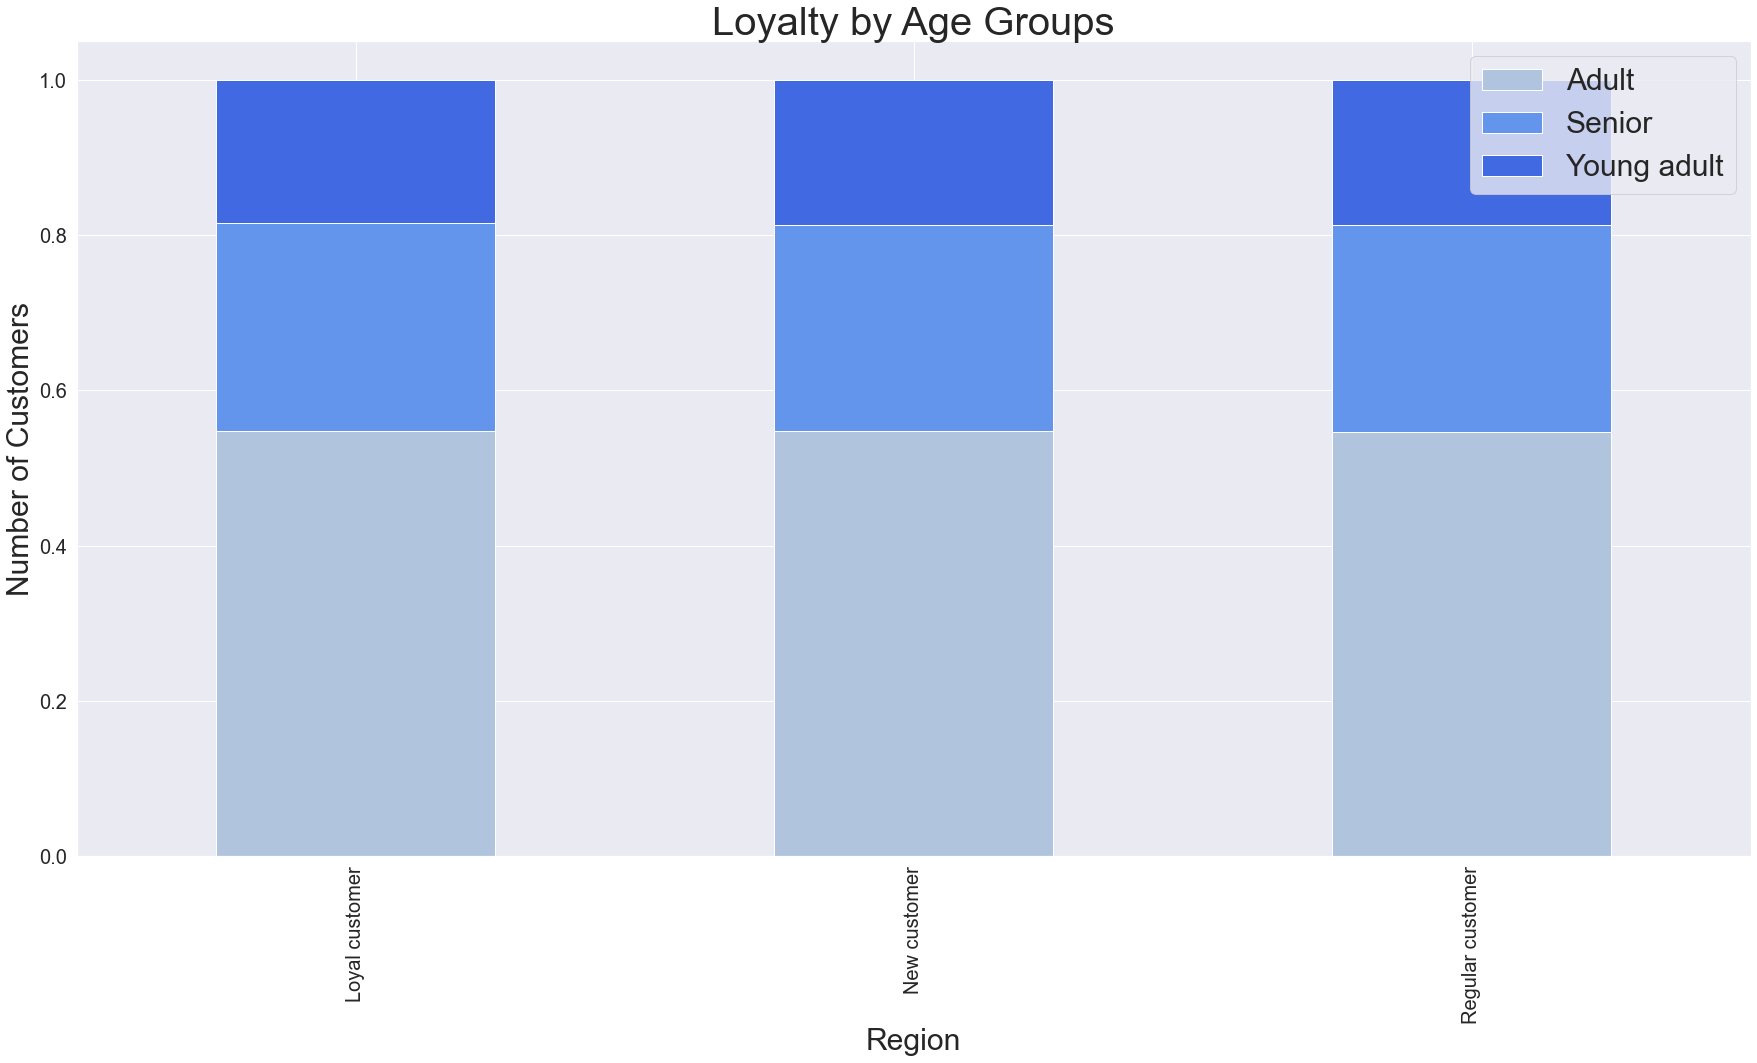

In [39]:
# Displaying loyalty_age_group as a bar chart
bar_loyalty_age = prop_loyal_age.plot.bar(color = ['lightsteelblue', 'cornflowerblue', 'royalblue'], stacked = True, fontsize = 20)
plt.title('Loyalty by Age Groups', fontsize = 40)
plt.xlabel('Region', fontsize = 30)
plt.ylabel('Number of Customers', fontsize = 30)
plt.legend(fontsize = 30)

In [40]:
# Price range by family group
price_family_group = pd.crosstab(active['dependent_group'], active['price_range'].sort_values(ascending = False))
price_family_group

price_range,High-range product,Low-range product,Mid-range product
dependent_group,,,
Has dependents,300498,7255602,15668783
No dependents,97455,2419238,5222988


In [41]:
prop_family = price_family_group.div(price_family_group.sum(axis=1), axis=0)

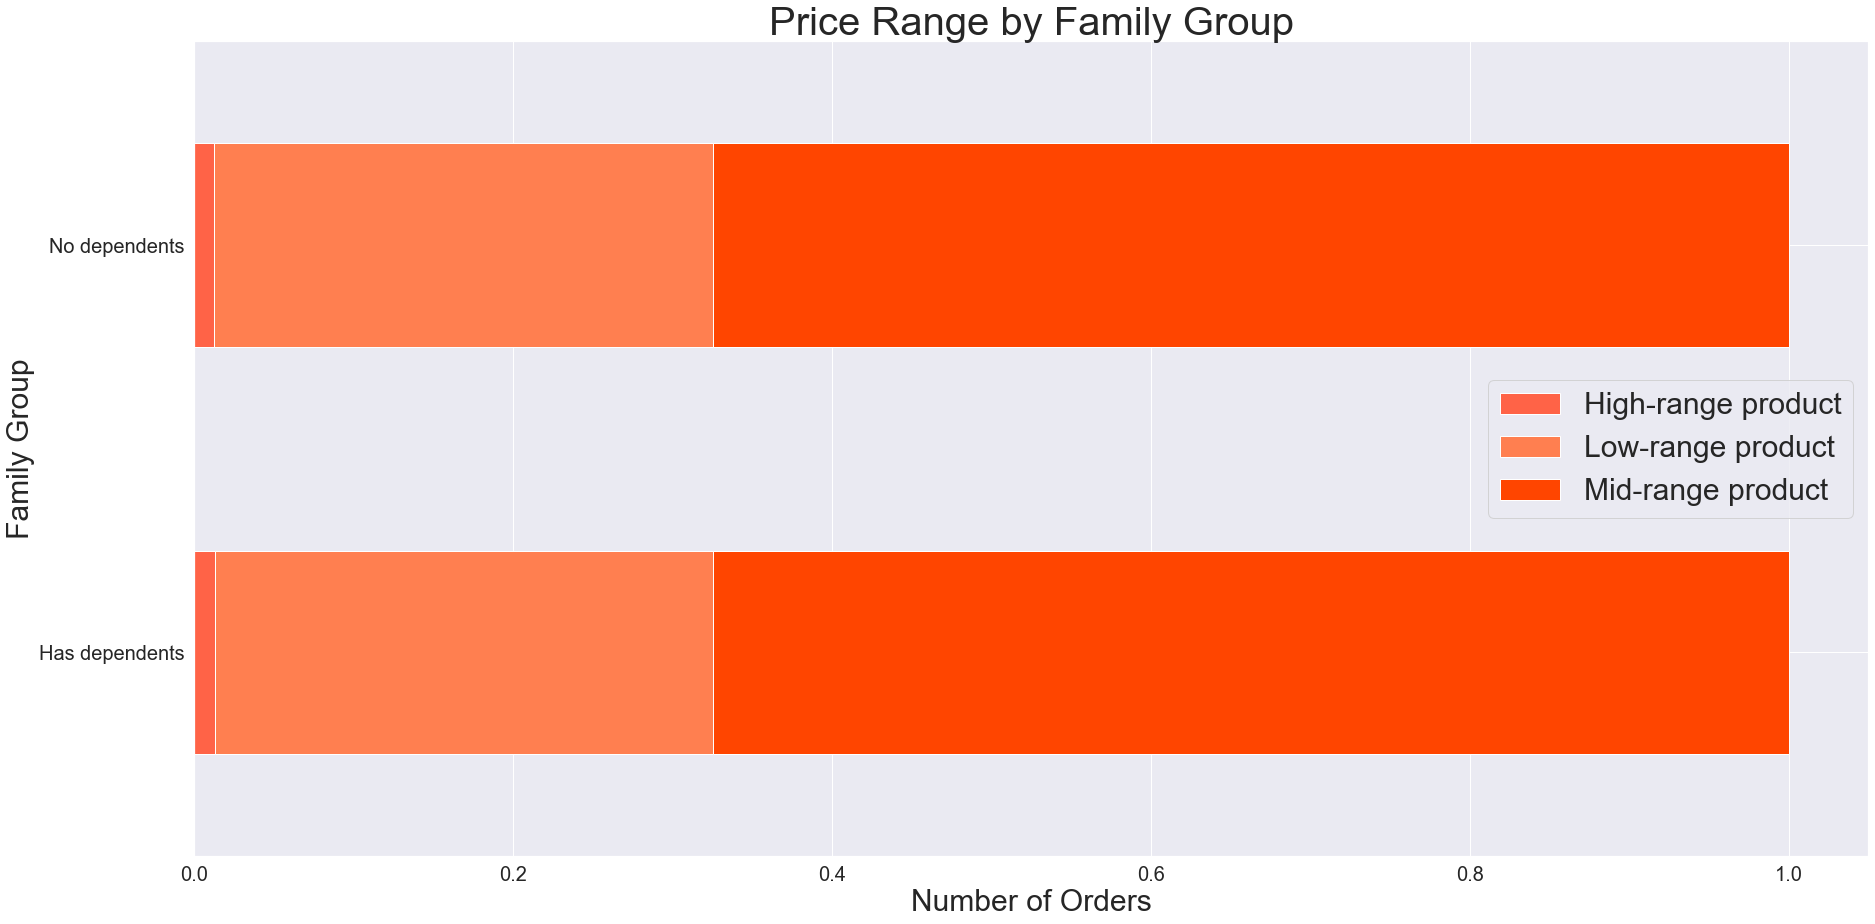

In [42]:
# Displaying price_range by family group as a stacked bar chart
bar_price_family = prop_family.plot.barh(color = ['tomato', 'coral', 'orangered'], stacked = True, fontsize = 20)
plt.title('Price Range by Family Group', fontsize = 40)
plt.xlabel('Number of Orders', fontsize = 30)
plt.ylabel('Family Group', fontsize = 30)
plt.legend(fontsize = 30)

In [43]:
# Loyalty by family group
loyalty_family_group = pd.crosstab(active_unique['loyalty_flag'], active_unique['dependent_group'].sort_values(ascending = False))
loyalty_family_group

dependent_group,Has dependents,No dependents
loyalty_flag,,
Loyal customer,12750,4267
New customer,51494,17256
Regular customer,57660,19204


In [44]:
prop_loyal_family = loyalty_family_group.div(loyalty_family_group.sum(axis=1), axis=0)

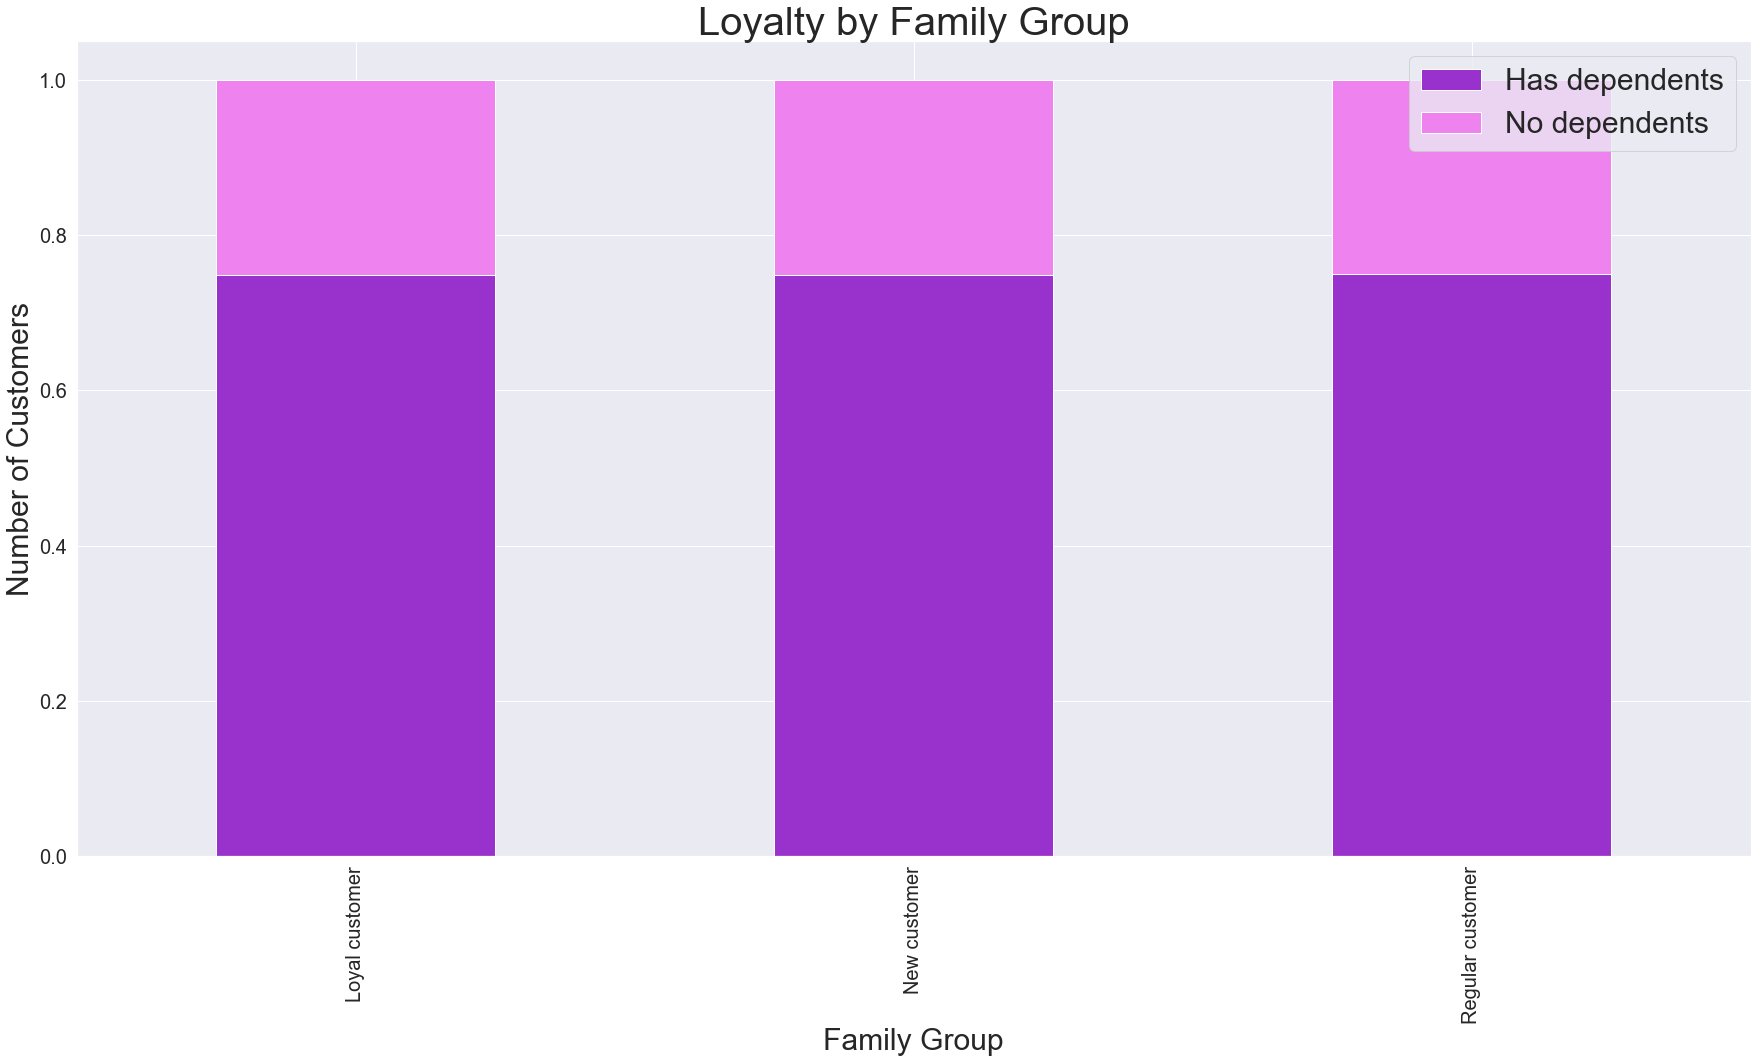

In [45]:
# Displaying loyalty_family_group as a bar chart
bar_loyalty_family = prop_loyal_family.plot.bar(color = ['darkorchid', 'violet'], stacked = True, fontsize = 20)
plt.title('Loyalty by Family Group', fontsize = 40)
plt.xlabel('Family Group', fontsize = 30)
plt.ylabel('Number of Customers', fontsize = 30)
plt.legend(fontsize = 30)

## Loyalty Flag Pie Chart and Aggregations

In [46]:
active_unique['loyalty_flag'].value_counts()

Regular customer    76864
New customer        68750
Loyal customer      17017
Name: loyalty_flag, dtype: int64

In [47]:
active_unique.groupby(['loyalty_flag']).agg({'prices':['mean']})

,prices
,mean
loyalty_flag,
Loyal customer,8.423194
New customer,7.655703
Regular customer,7.870859


In [48]:
active_unique.groupby(['loyalty_flag']).agg({'days_since_prior_order':['mean']})

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,6.458454
New customer,18.191524
Regular customer,13.299576


In [49]:
active.groupby(['loyalty_flag']).agg({'order_frequency':['mean']})

,order_frequency
,mean
loyalty_flag,
Loyal customer,5.170559
New customer,18.037059
Regular customer,10.612951


In [50]:
active_unique.groupby(['loyalty_flag']).agg({'order_frequency':['mean']})

,order_frequency
,mean
loyalty_flag,
Loyal customer,5.303843
New customer,18.338400
Regular customer,11.544871


In [51]:
active_unique.groupby(['loyalty_flag']).agg({'days_since_prior_order':['mean']})

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,6.458454
New customer,18.191524
Regular customer,13.299576


In [52]:
active.groupby(['loyalty_flag']).agg({'prices':['mean']})

,prices
,mean
loyalty_flag,
Loyal customer,10.386336
New customer,13.387725
Regular customer,12.495717


Text(0.5, 1.0, 'Number of Customers in Each Loyalty Group')

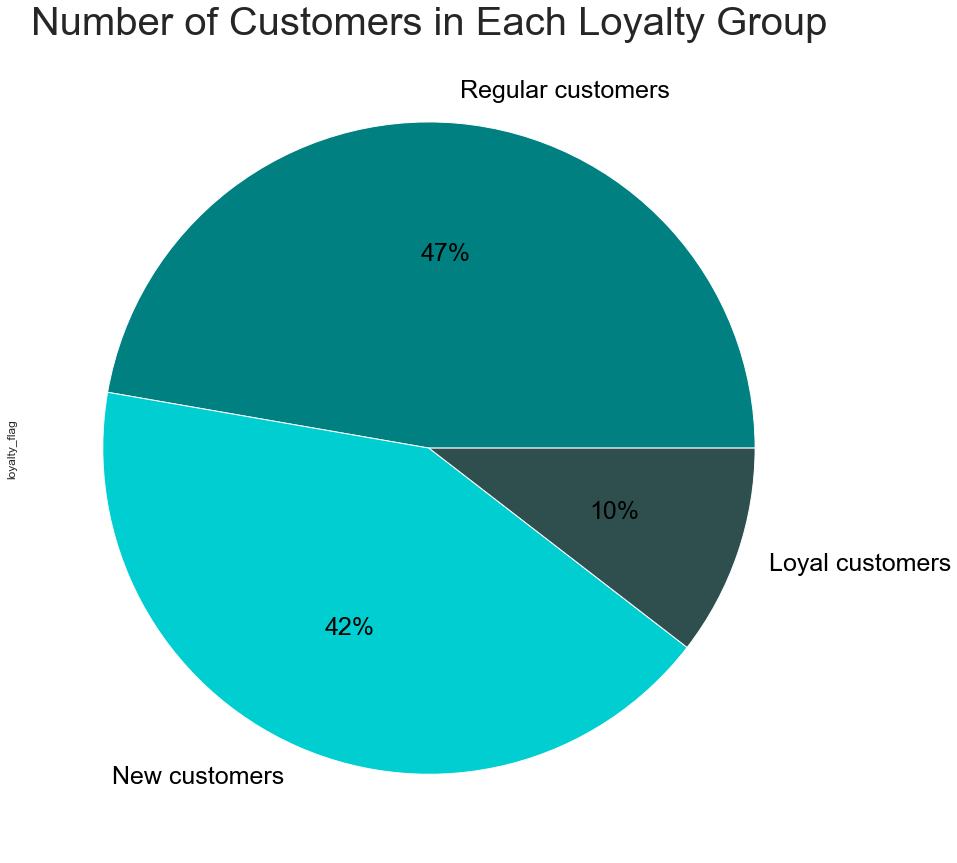

In [53]:
# Pie chart for number of customers in each loyalty group
labels = ['Regular customers', 'New customers', 'Loyal customers']
pie_loyalty_custs = active_unique['loyalty_flag'].value_counts().plot.pie(labels = labels, autopct=('%1.f%%'), colors=['teal', 'darkturquoise', 'darkslategray'], textprops={'fontsize': 25, 'color': 'black'})
plt.title('Number of Customers in Each Loyalty Group', fontsize = 40)

Text(0.5, 1.0, 'Number of Orders from Each Loyalty Group')

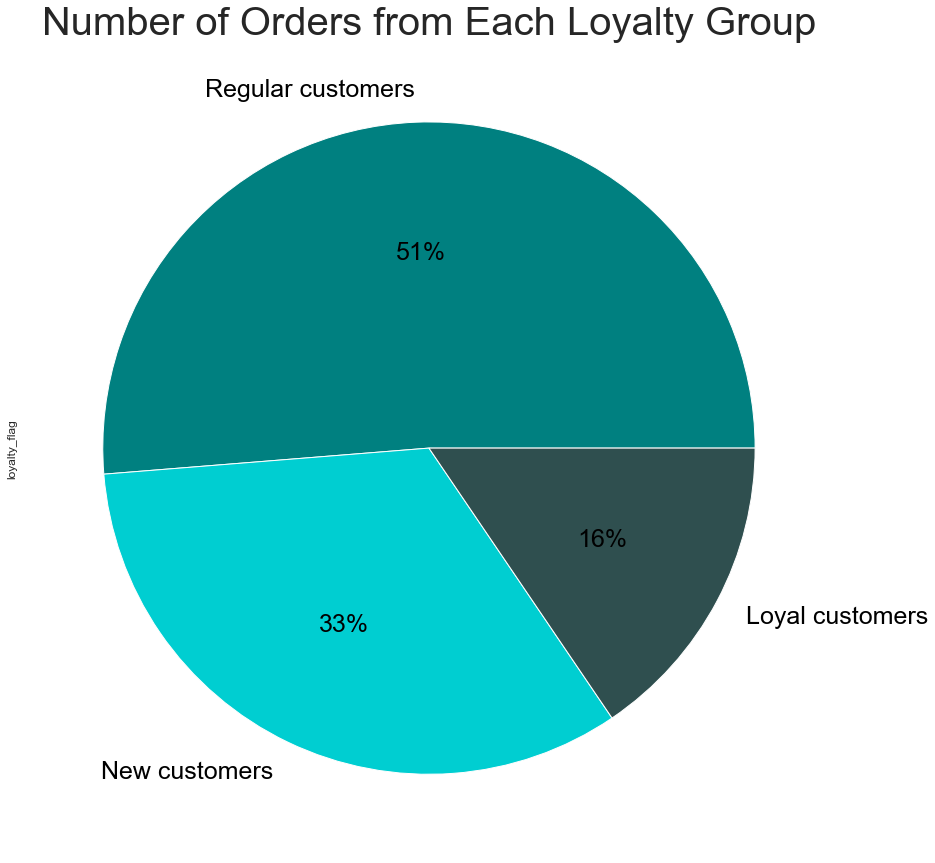

In [54]:
# Pie chart for number of orders from each loyalty group
labels = ['Regular customers', 'New customers', 'Loyal customers']
pie_loyalty_ords = active['loyalty_flag'].value_counts().plot.pie(labels = labels, autopct=('%1.f%%'), colors=['teal', 'darkturquoise', 'darkslategray'], textprops={'fontsize': 25, 'color': 'black'})
plt.title('Number of Orders from Each Loyalty Group', fontsize = 40)

## Additional Visualizations

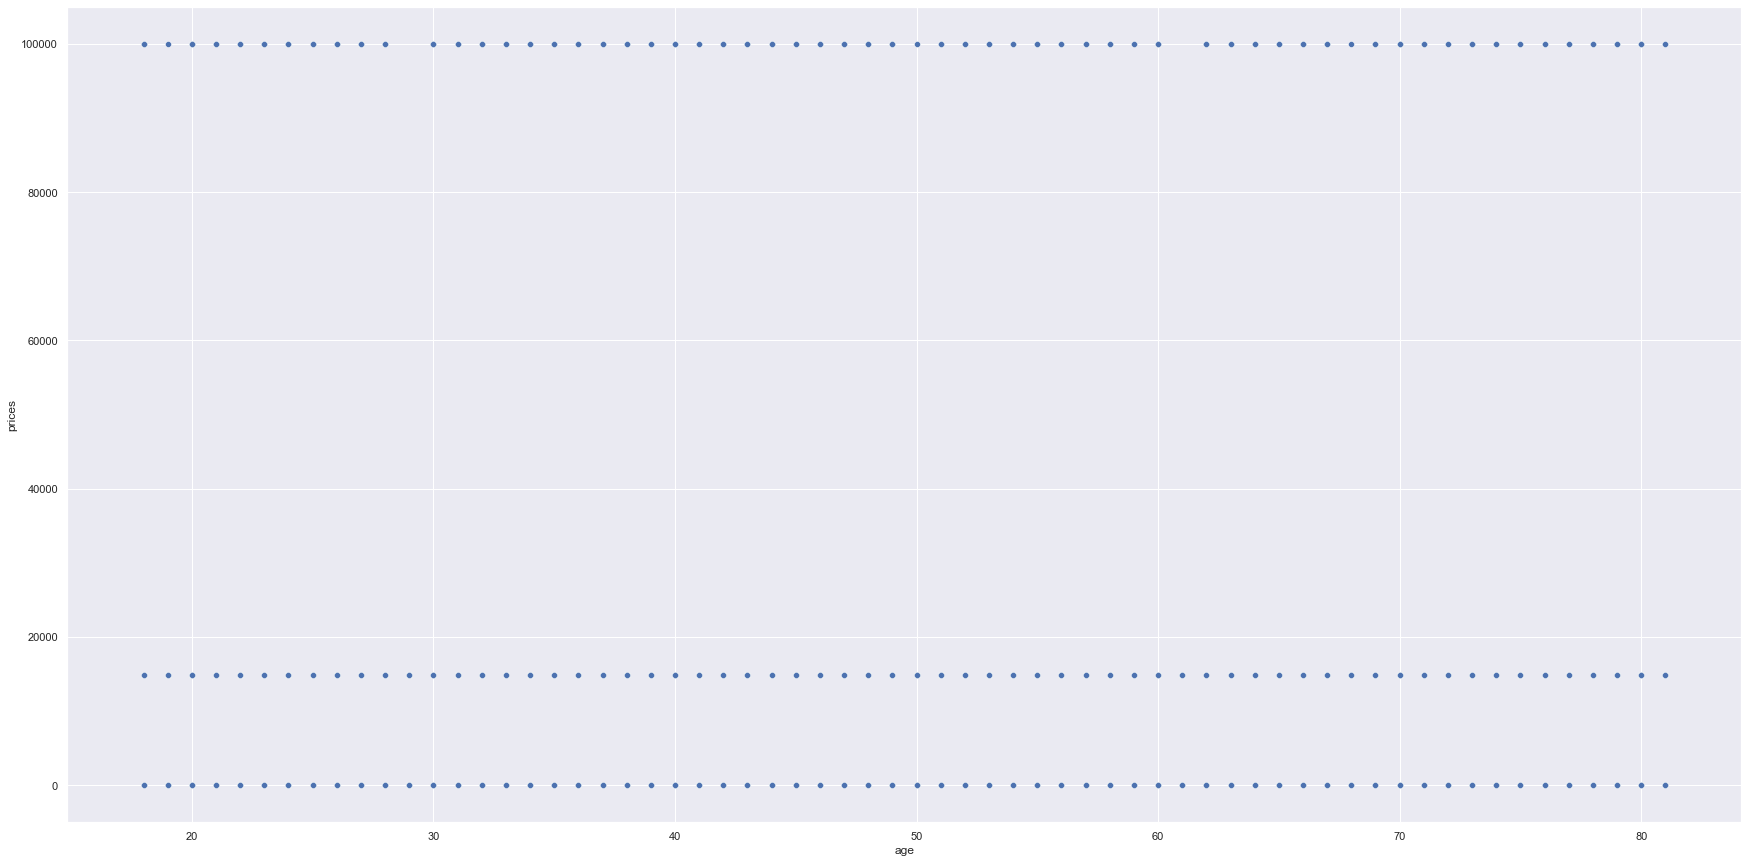

In [55]:
# Scatterplot of max order and income
scatter = sns.scatterplot(x = 'age', y = 'prices', data = active)

In [56]:
active_unique.loc[active_unique['prices'] > 100, 'prices'] = np.nan

In [57]:
active_unique['prices'].max()

25.0

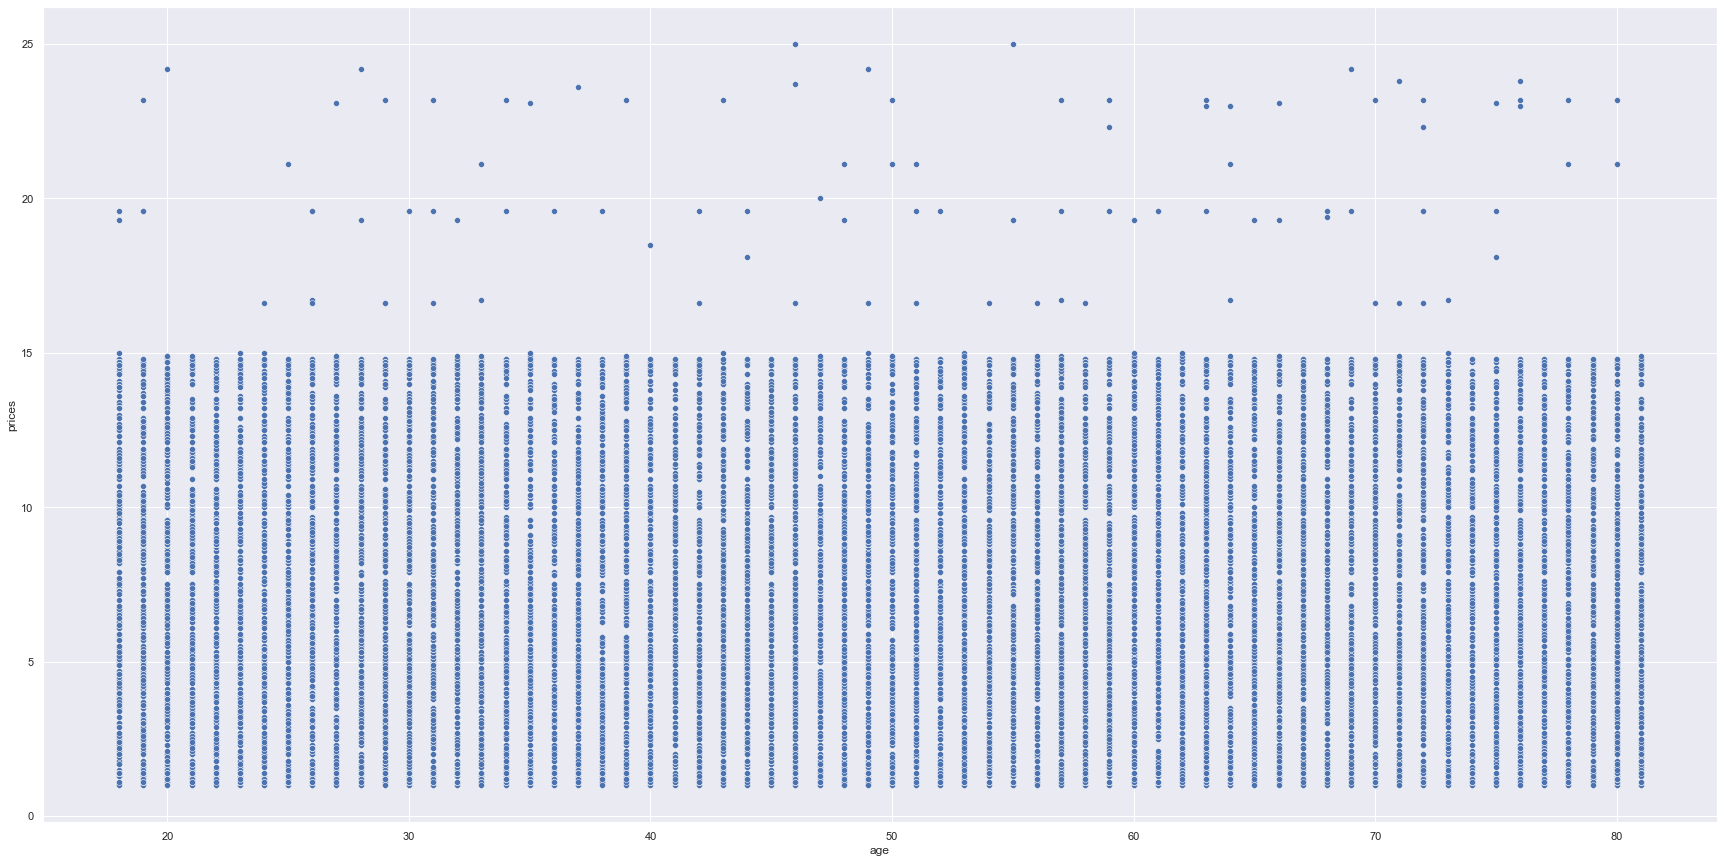

In [58]:
scatter_age_prices = sns.scatterplot(x = 'age', y = 'prices', data = active_unique)

In [59]:
depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [60]:
depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [61]:
depts.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [62]:
pd.set_option('display.max_columns', None)

In [63]:
active_unique.head()

,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,prices,price_range,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_order,spending_flag,order_frequency,frequency_flag,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependents,income,region,age_group,income_group,dependent_group
0,2539329,1,2,8,NaN,True,196,1,0,Soda,77,7,NaN,9.0,NaN,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,1,NaN,NaN,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents
59,2968173,15,1,9,7.0,False,196,2,0,Soda,77,7,NaN,9.0,NaN,Busiest days,Average orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,15,NaN,NaN,Female,Indiana,69,6/3/2019,NaN,54313,Midwest,Senior,Mid income,No dependents
131,2293453,2,5,14,6.0,False,196,3,0,Soda,77,7,NaN,9.0,NaN,Regularly busy,Most orders,9,New customer,8.372059,Low spender,6.0,Frequent customer,19,NaN,NaN,Female,Louisiana,62,2/3/2017,NaN,151988,South,Adult,High income,Has dependents
335,1573906,10,3,10,6.0,False,196,2,0,Soda,77,7,NaN,9.0,NaN,Slowest days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,21,NaN,NaN,Male,Montana,71,6/18/2019,NaN,124643,West,Senior,High income,No dependents
540,1593000,10,3,8,7.0,False,196,17,0,Soda,77,7,NaN,9.0,NaN,Slowest days,Average orders,20,Regular customer,8.137793,Low spender,6.0,Frequent customer,31,NaN,NaN,Female,Oklahoma,38,1/22/2019,NaN,52311,South,Adult,Mid income,Has dependents


In [64]:
# Turning depts into data dictionary
zipped = zip(depts['department_id'], depts['department'])
data_dict = dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [65]:
# Mapping dept names to dept id in active and active_unique
active['department'] = active['department_id'].map(data_dict)
active_unique['department'] = active_unique['department_id'].map(data_dict)

In [66]:
active.head()

,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,prices,price_range,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_order,spending_flag,order_frequency,frequency_flag,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependents,income,region,age_group,income_group,dependent_group
0,2539329,1,2,8,NaN,True,196,1,0,Soda,77,7,beverages,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,1,NaN,NaN,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents
1,2398795,2,3,7,15.0,False,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,1,NaN,NaN,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents
2,473747,3,3,12,21.0,False,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,1,NaN,NaN,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents
3,2254736,4,4,7,29.0,False,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,1,NaN,NaN,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents
4,431534,5,4,15,28.0,False,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,1,NaN,NaN,Female,Alabama,31,2/17/2019,NaN,40423,South,Adult,Mid income,Has dependents


In [67]:
active.columns

Index(['order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'new_customer', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'department', 'prices', 'price_range', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_order',
       'spending_flag', 'order_frequency', 'frequency_flag', 'user_id',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependents', 'income', 'region', 'age_group', 'income_group',
       'dependent_group'],
      dtype='object')

In [68]:
# Reordering columns for readability
active = active.reindex(columns=['order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
'new_customer', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'department', 'prices',
'price_range', 'busiest_day', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_order','spending_flag', 'order_frequency',
'frequency_flag', 'user_id', 'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined', 'num_of_dependents', 'income',
'region', 'age_group', 'income_group', 'dependent_group'])

In [69]:
active.columns

Index(['order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'new_customer', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'department', 'prices', 'price_range', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_order',
       'spending_flag', 'order_frequency', 'frequency_flag', 'user_id',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependents', 'income', 'region', 'age_group', 'income_group',
       'dependent_group'],
      dtype='object')

In [70]:
# Age group by department
dept_age = pd.crosstab(active_unique['department'], active_unique['age_group'].sort_values(ascending = False))
dept_age

age_group,Adult,Senior,Young adult
department,,,
alcohol,143,66,39
babies,23,17,5
bakery,253,131,95
beverages,5293,2664,1753
breakfast,354,170,115
canned goods,219,100,82
dairy eggs,10108,4782,3396
deli,3923,1927,1401
dry goods pasta,68,36,19


In [71]:
dept_age = dept_age.reindex(columns = ['Young adult', 'Adult', 'Senior'])
dept_age

age_group,Young adult,Adult,Senior
department,,,
alcohol,39,143,66
babies,5,23,17
bakery,95,253,131
beverages,1753,5293,2664
breakfast,115,354,170
canned goods,82,219,100
dairy eggs,3396,10108,4782
deli,1401,3923,1927
dry goods pasta,19,68,36


In [72]:
dept_age = dept_age.div(dept_age.sum(axis=1), axis=0)

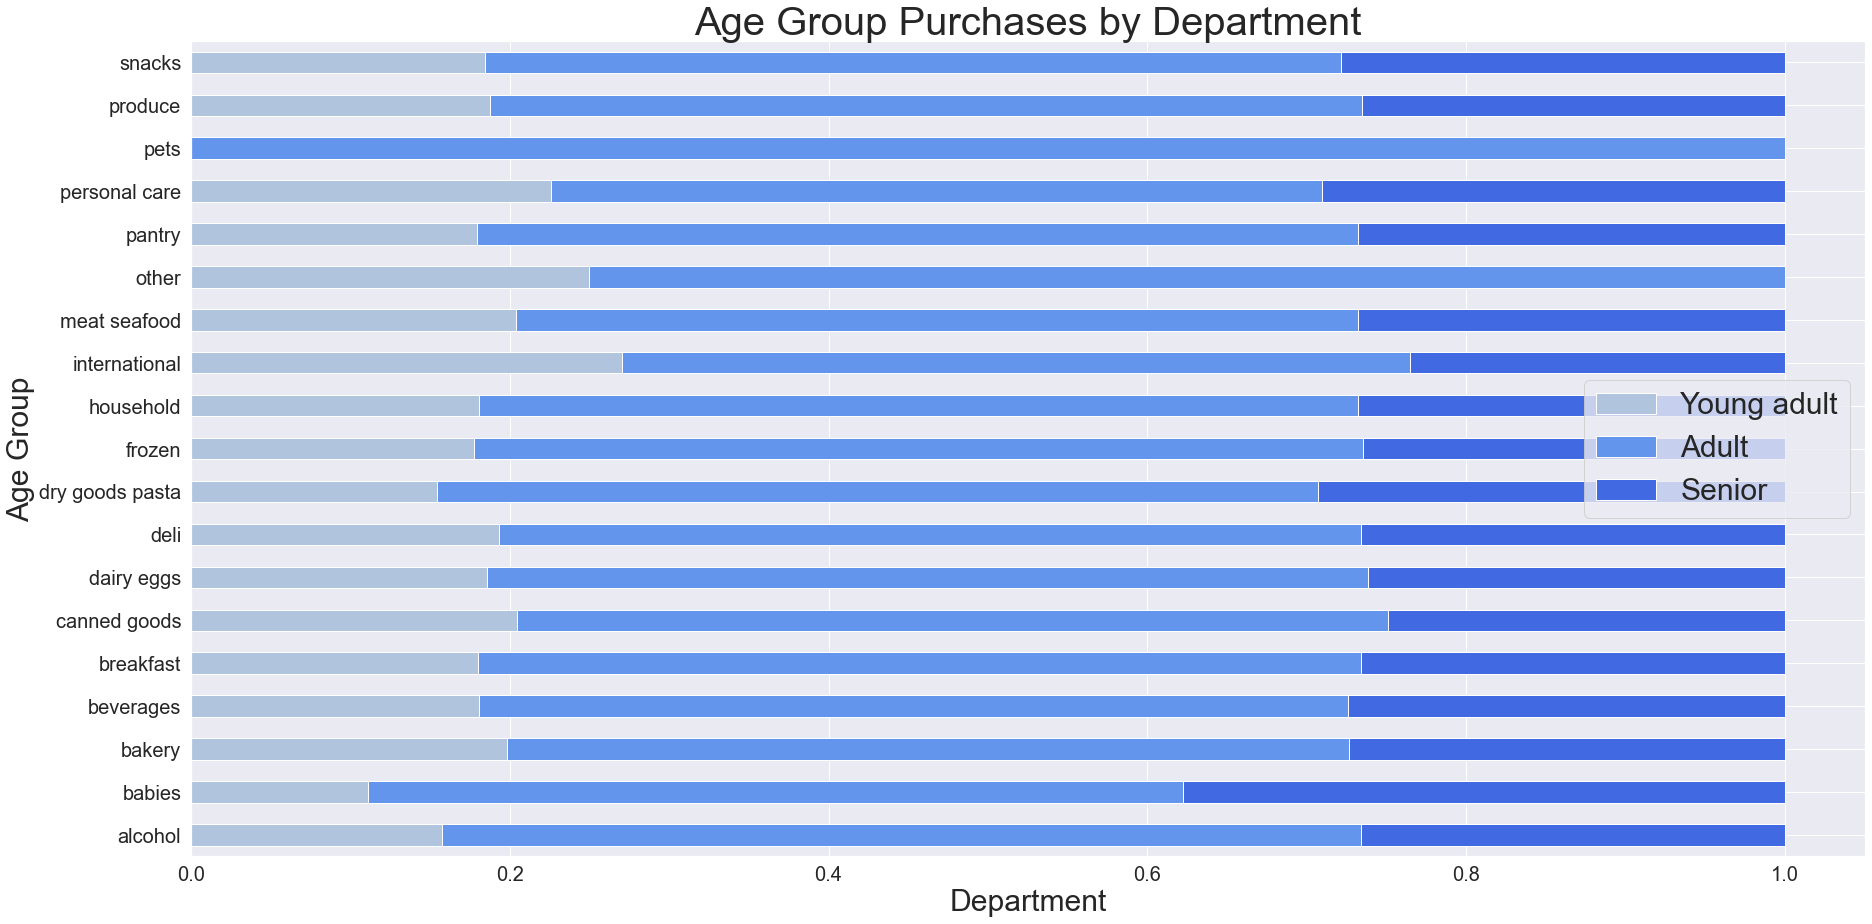

In [73]:
# Displaying dept_age as a stacked bar chart
bar_dept_age = dept_age.plot.barh(color = ['lightsteelblue', 'cornflowerblue', 'royalblue'], stacked = True, fontsize = 20)
plt.title('Age Group Purchases by Department', fontsize = 40)
plt.xlabel('Department', fontsize = 30)
plt.ylabel('Age Group', fontsize = 30)
plt.legend(fontsize = 30)

In [74]:
# Income group by department
dept_income = pd.crosstab(active['department'], active['income_group'].sort_values(ascending = False))
dept_income

income_group,High income,Low income,Mid income
department,,,
alcohol,69142,8718,66767
babies,196704,12547,201141
bakery,527711,49409,543708
beverages,1126462,191662,1253777
breakfast,297596,46066,327188
bulk,14218,2247,16986
canned goods,485253,34946,491875
dairy eggs,2406211,235552,2535419
deli,462099,51355,490380


In [75]:
dept_income = dept_income.reindex(columns = ['Low income', 'Mid income', 'High income'])
dept_income

income_group,Low income,Mid income,High income
department,,,
alcohol,8718,66767,69142
babies,12547,201141,196704
bakery,49409,543708,527711
beverages,191662,1253777,1126462
breakfast,46066,327188,297596
bulk,2247,16986,14218
canned goods,34946,491875,485253
dairy eggs,235552,2535419,2406211
deli,51355,490380,462099


In [76]:
dept_income = dept_income.div(dept_income.sum(axis=1), axis=0)

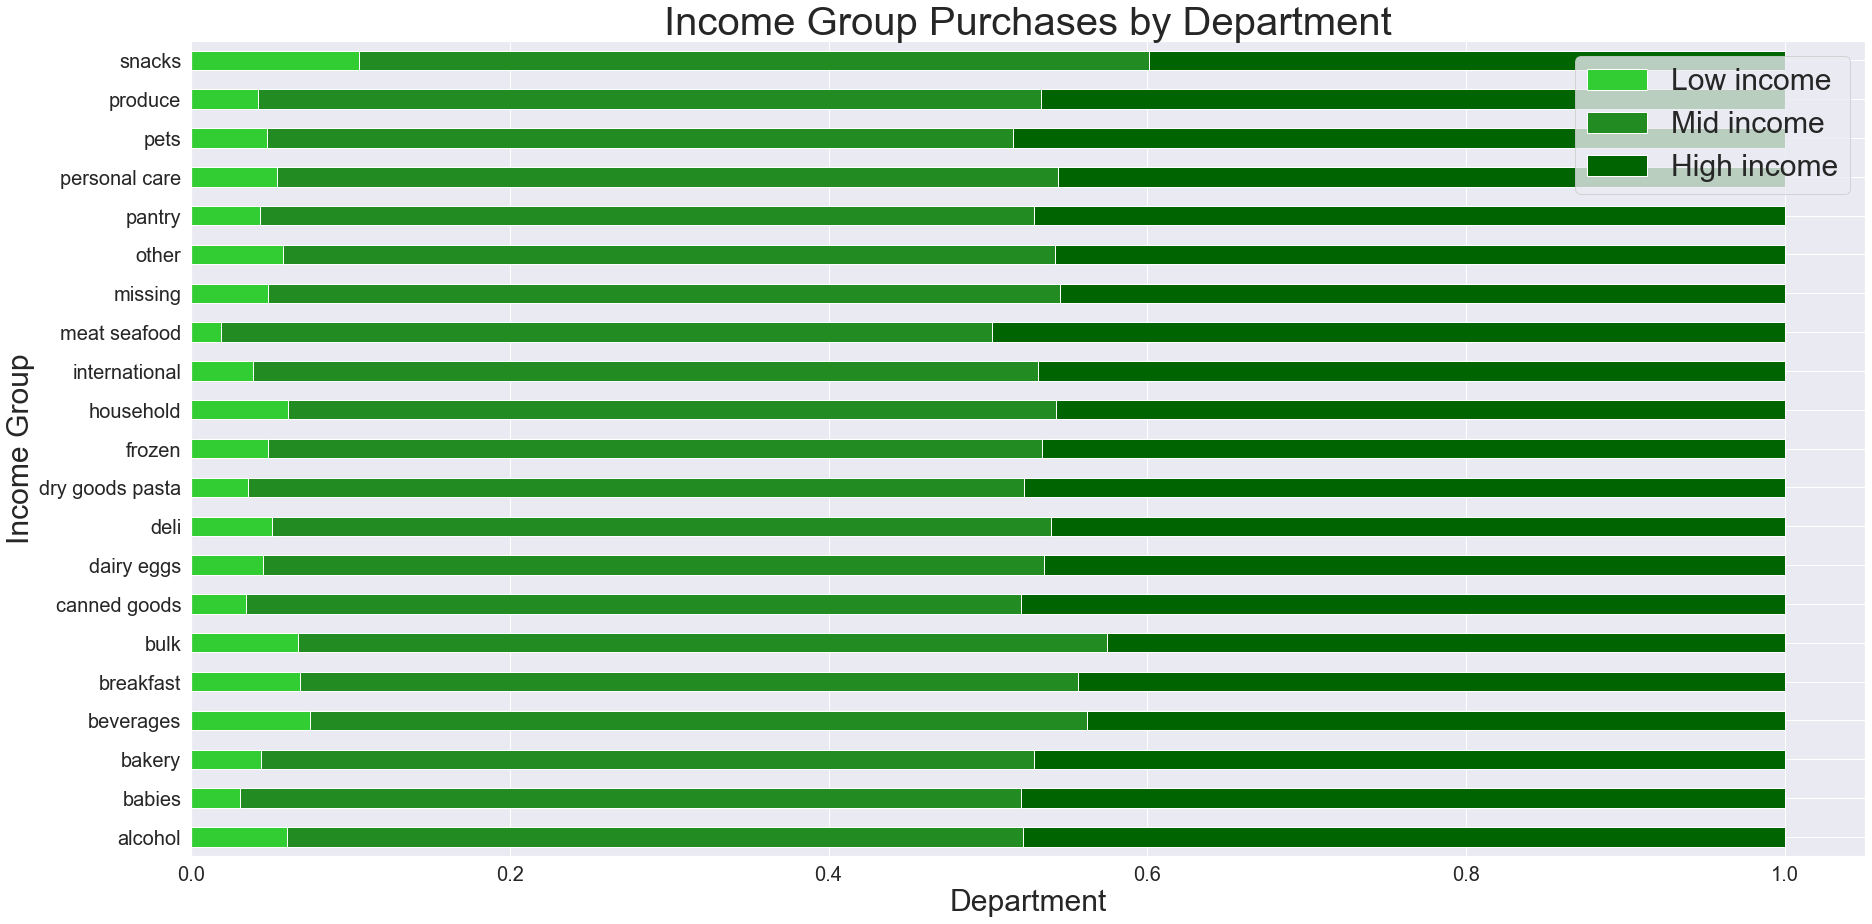

In [77]:
# Displaying dept_income as a stacked bar chart
bar_dept_income = dept_income.plot.barh(color = ['limegreen', 'forestgreen', 'darkgreen'], stacked = True, fontsize = 20)
plt.title('Income Group Purchases by Department', fontsize = 40)
plt.xlabel('Department', fontsize = 30)
plt.ylabel('Income Group', fontsize = 30)
plt.legend(fontsize = 30)

In [78]:
# Family group by department
dept_family = pd.crosstab(active['department'], active['dependent_group'].sort_values(ascending = False))
dept_family

dependent_group,Has dependents,No dependents
department,,
alcohol,107800,36827
babies,307064,103328
bakery,839433,281395
beverages,1926560,645341
breakfast,504418,166432
bulk,25451,8000
canned goods,761054,251020
dairy eggs,3882806,1294376
deli,750452,253382


In [79]:
dept_family = dept_family.div(dept_family.sum(axis=1), axis=0)

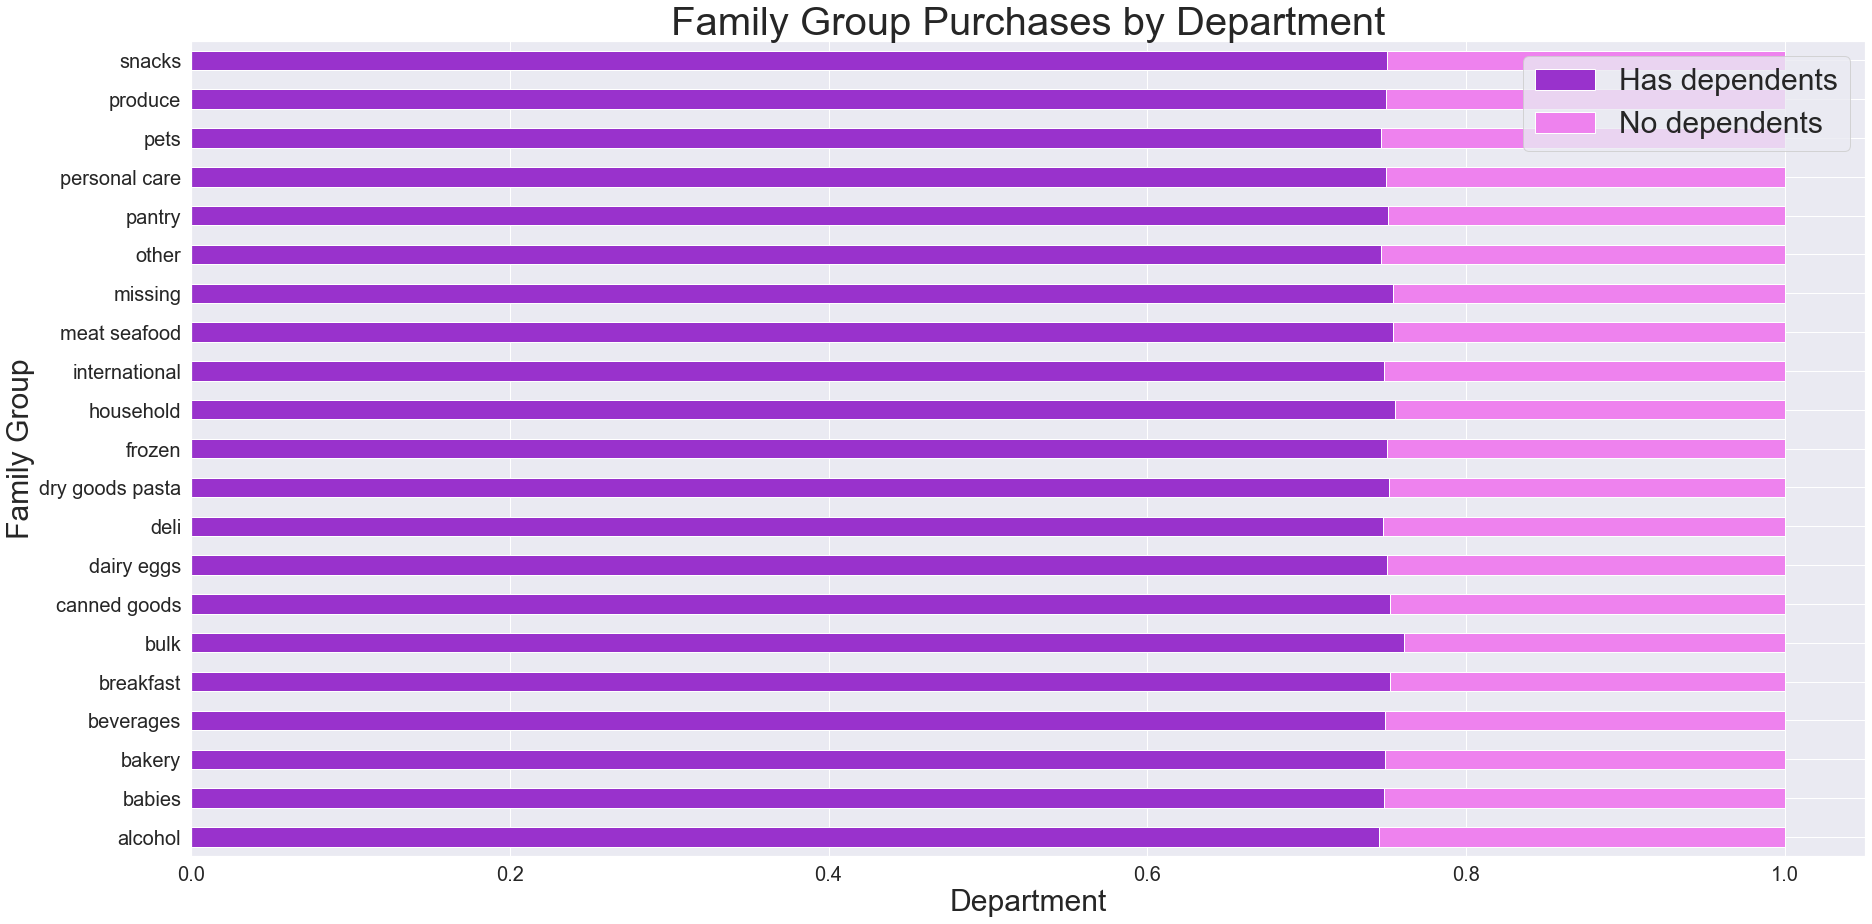

In [80]:
# Displaying dept_family as a stacked bar chart
bar_dept_family = dept_family.plot.barh(color = ['darkorchid', 'violet'], stacked = True, fontsize = 20)
plt.title('Family Group Purchases by Department', fontsize = 40)
plt.xlabel('Department', fontsize = 30)
plt.ylabel('Family Group', fontsize = 30)
plt.legend(fontsize = 30)

# 09. Exporting Data and Visualizations

In [81]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_profile'))

In [82]:
income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group_profile'))

In [83]:
bar_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_income_stacked'))

In [84]:
pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_family_group'))

In [85]:
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region'))

In [86]:
bar_tot_custs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customers_region'))

In [87]:
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region'))

In [88]:
bar_dependents_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_group_region'))

In [89]:
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_freq_depts'))

In [90]:
pie_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range'))

In [91]:
bar_price_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_price_region'))

In [92]:
bar_price_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_price_age'))

In [93]:
bar_loyalty_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stackeitems_by_price_range_pie'))

In [94]:
bar_price_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_price_family'))

In [95]:
bar_loyalty_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_loyalty_family'))

In [96]:
pie_loyalty_custs.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty_custs'))

In [97]:
pie_loyalty_ords.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty_ords'))

In [98]:
scatter_age_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_prices'))

In [99]:
bar_dept_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_age'))

In [100]:
bar_dept_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_income'))

In [101]:
bar_dept_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_family'))